In [493]:
#pip install xgboost

In [494]:
# Libraries
import numpy as np
import pandas as pd
import warnings

# Viz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Stats
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm

# ML
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report 

In [495]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [496]:
data = pd.read_csv('king_ country_ houses_aa.csv')
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


id: A unique identifier for a house.

date: The date on which the house was sold.

price: The sale price of the house (prediction target).

bedrooms: Number of bedrooms in the house.

bathrooms: Number of bathrooms in the house, per bedroom.

sqft_living: Square footage of the interior living space.

sqft_lot: Square footage of the land space.

floors: Number of floors (levels) in the house.

waterfront: Whether the house has a waterfront view.

view: Number of times the house has been viewed.

condition: The overall condition of the house.

grade: The overall grade given to the house, based on the King County grading system.

sqft_above: Square footage of the house apart from the basement.

sqft_basement: Square footage of the basement.

yr_built: The year the house was built.

yr_renovated: The year the house was renovated.

zipcode: ZIP code area.

lat: Latitude coordinate.

long: Longitude coordinate.

sqft_living15: The interior living space for the nearest 15 neighbors in 2015.

sqft_lot15: The land spaces for the nearest 15 neighbors in 2015.

TARGET --> Price: Our primary focus is to understand which features most significantly impact the house price. Additionally, we aim to explore properties valued at $650K and above for more detailed insights.

In [497]:
# Copy dataframe
df = data.copy()

In [498]:
df.shape

(21613, 21)

In [499]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [500]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [501]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [502]:
# possible categorical data
"""
COLUMNS:
view (0,1,2,3,4)
waterfront (0,1)

"""

'\nCOLUMNS:\nview (0,1,2,3,4)\nwaterfront (0,1)\n\n'

In [503]:
df.date

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [504]:
# DATA CLEANING
df['date_format'] = pd.to_datetime(df['date'], format ='%Y%m%dT%H%M%S') # convert to date format  
df.insert(0, 'date_format', df.pop('date_format')) # locate date column in the front


# Drop columns
df.drop(columns=['id'],inplace=True)
df.drop(columns=['date'],inplace=True)

# Set it as index
df.set_index('date_format', inplace=True)

In [505]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [506]:
round(df.describe(), 2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


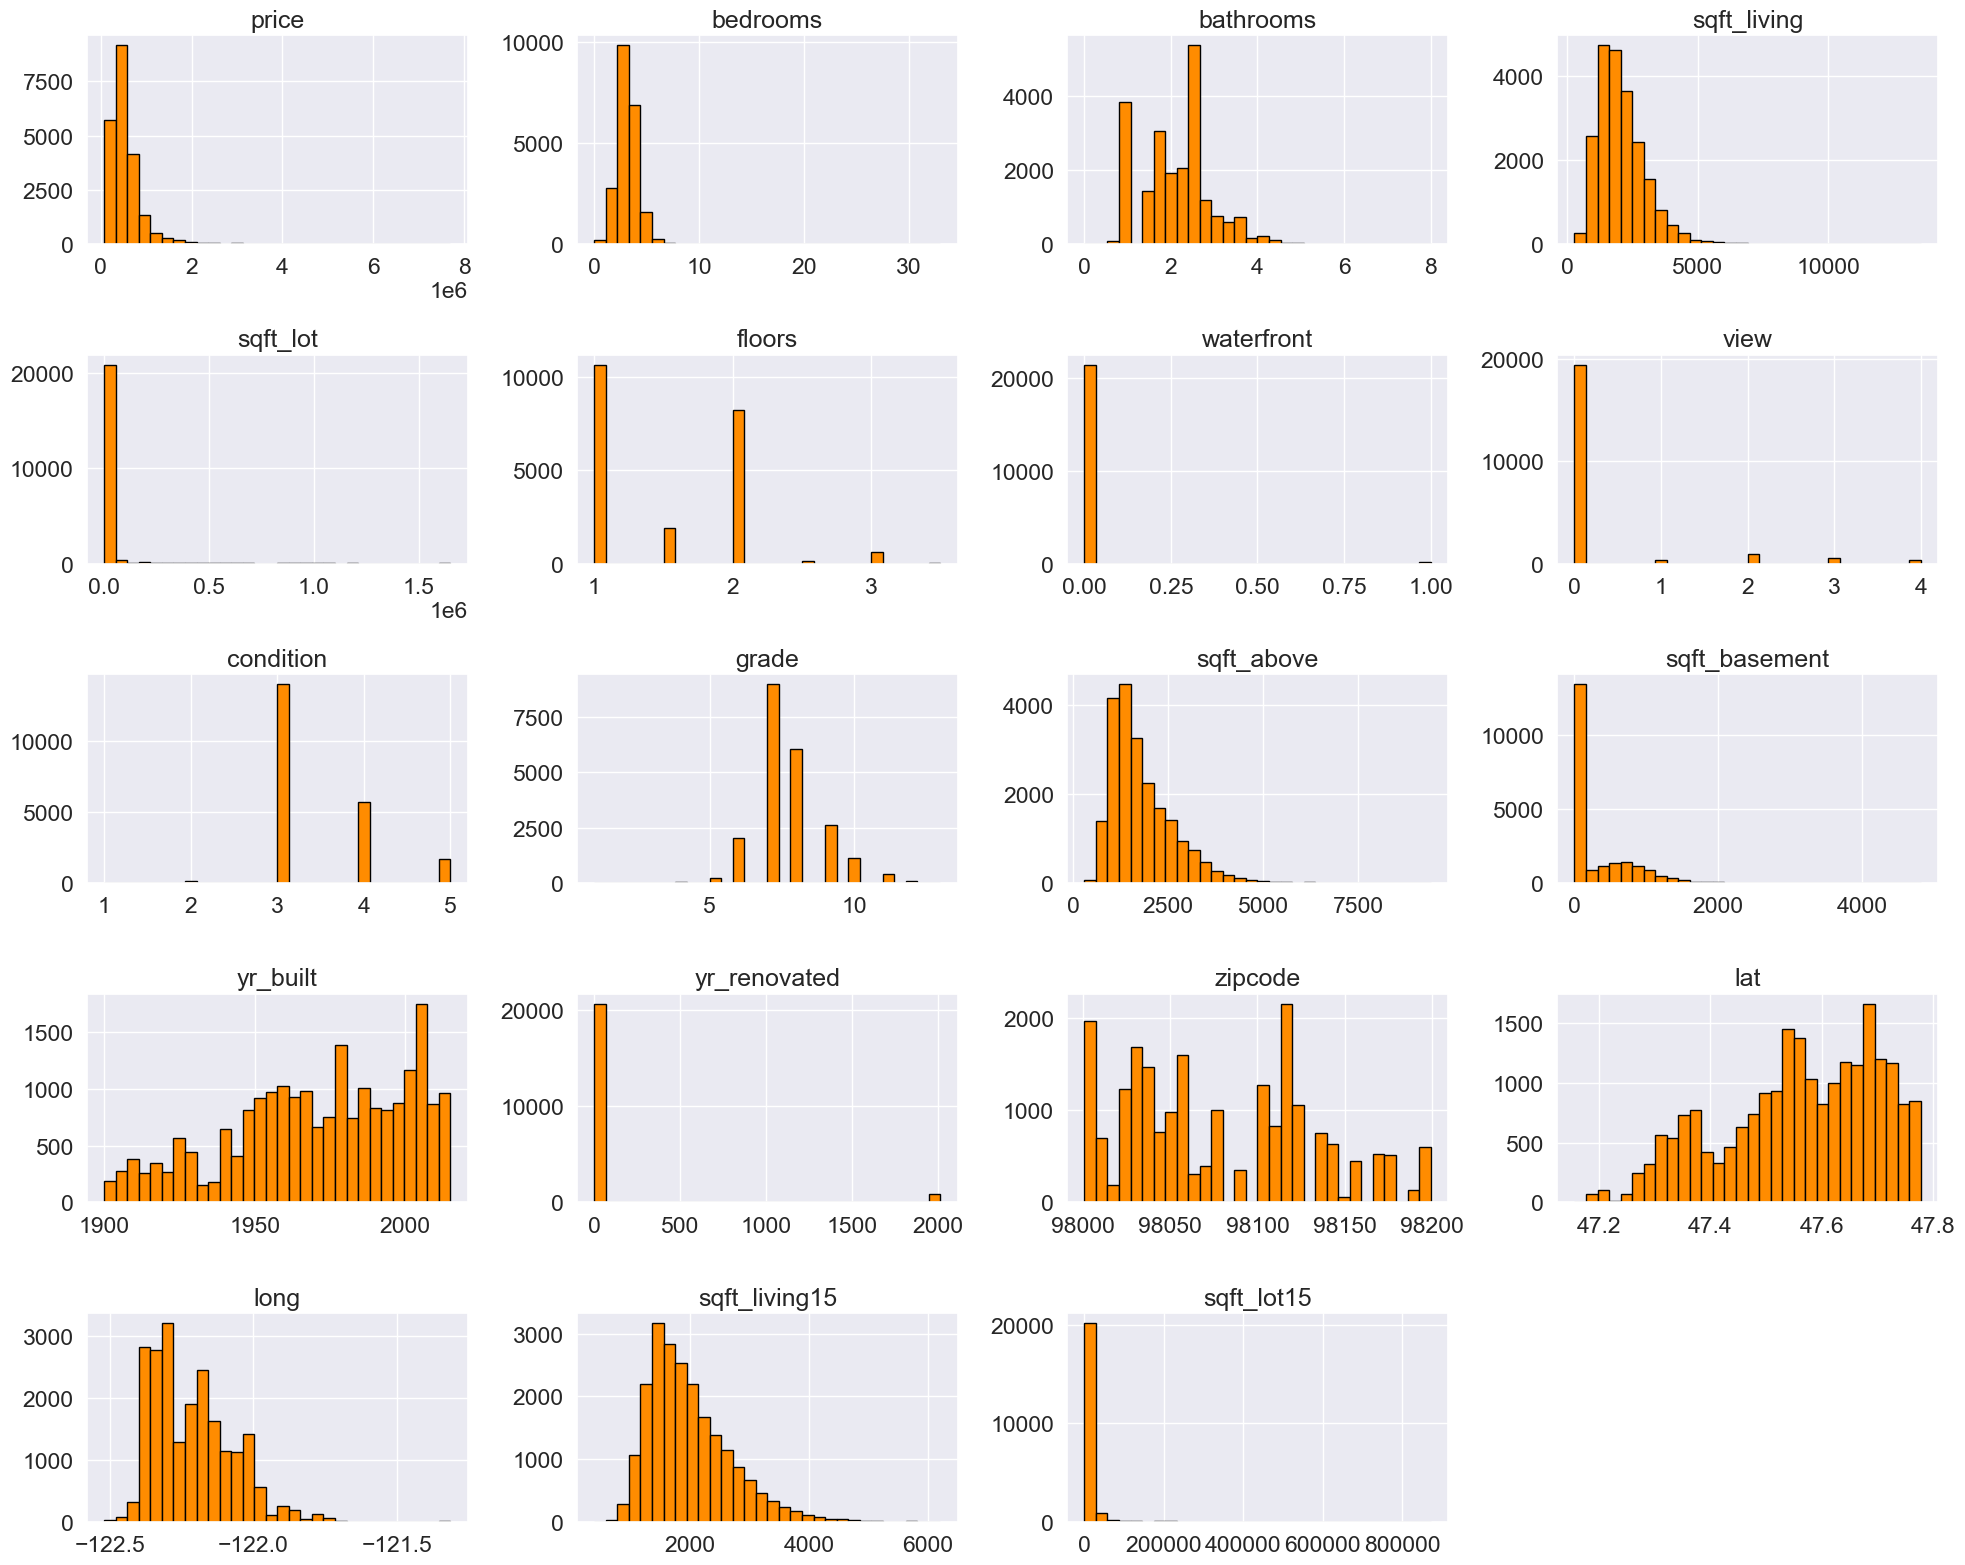

In [507]:
# Checking Distributions
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

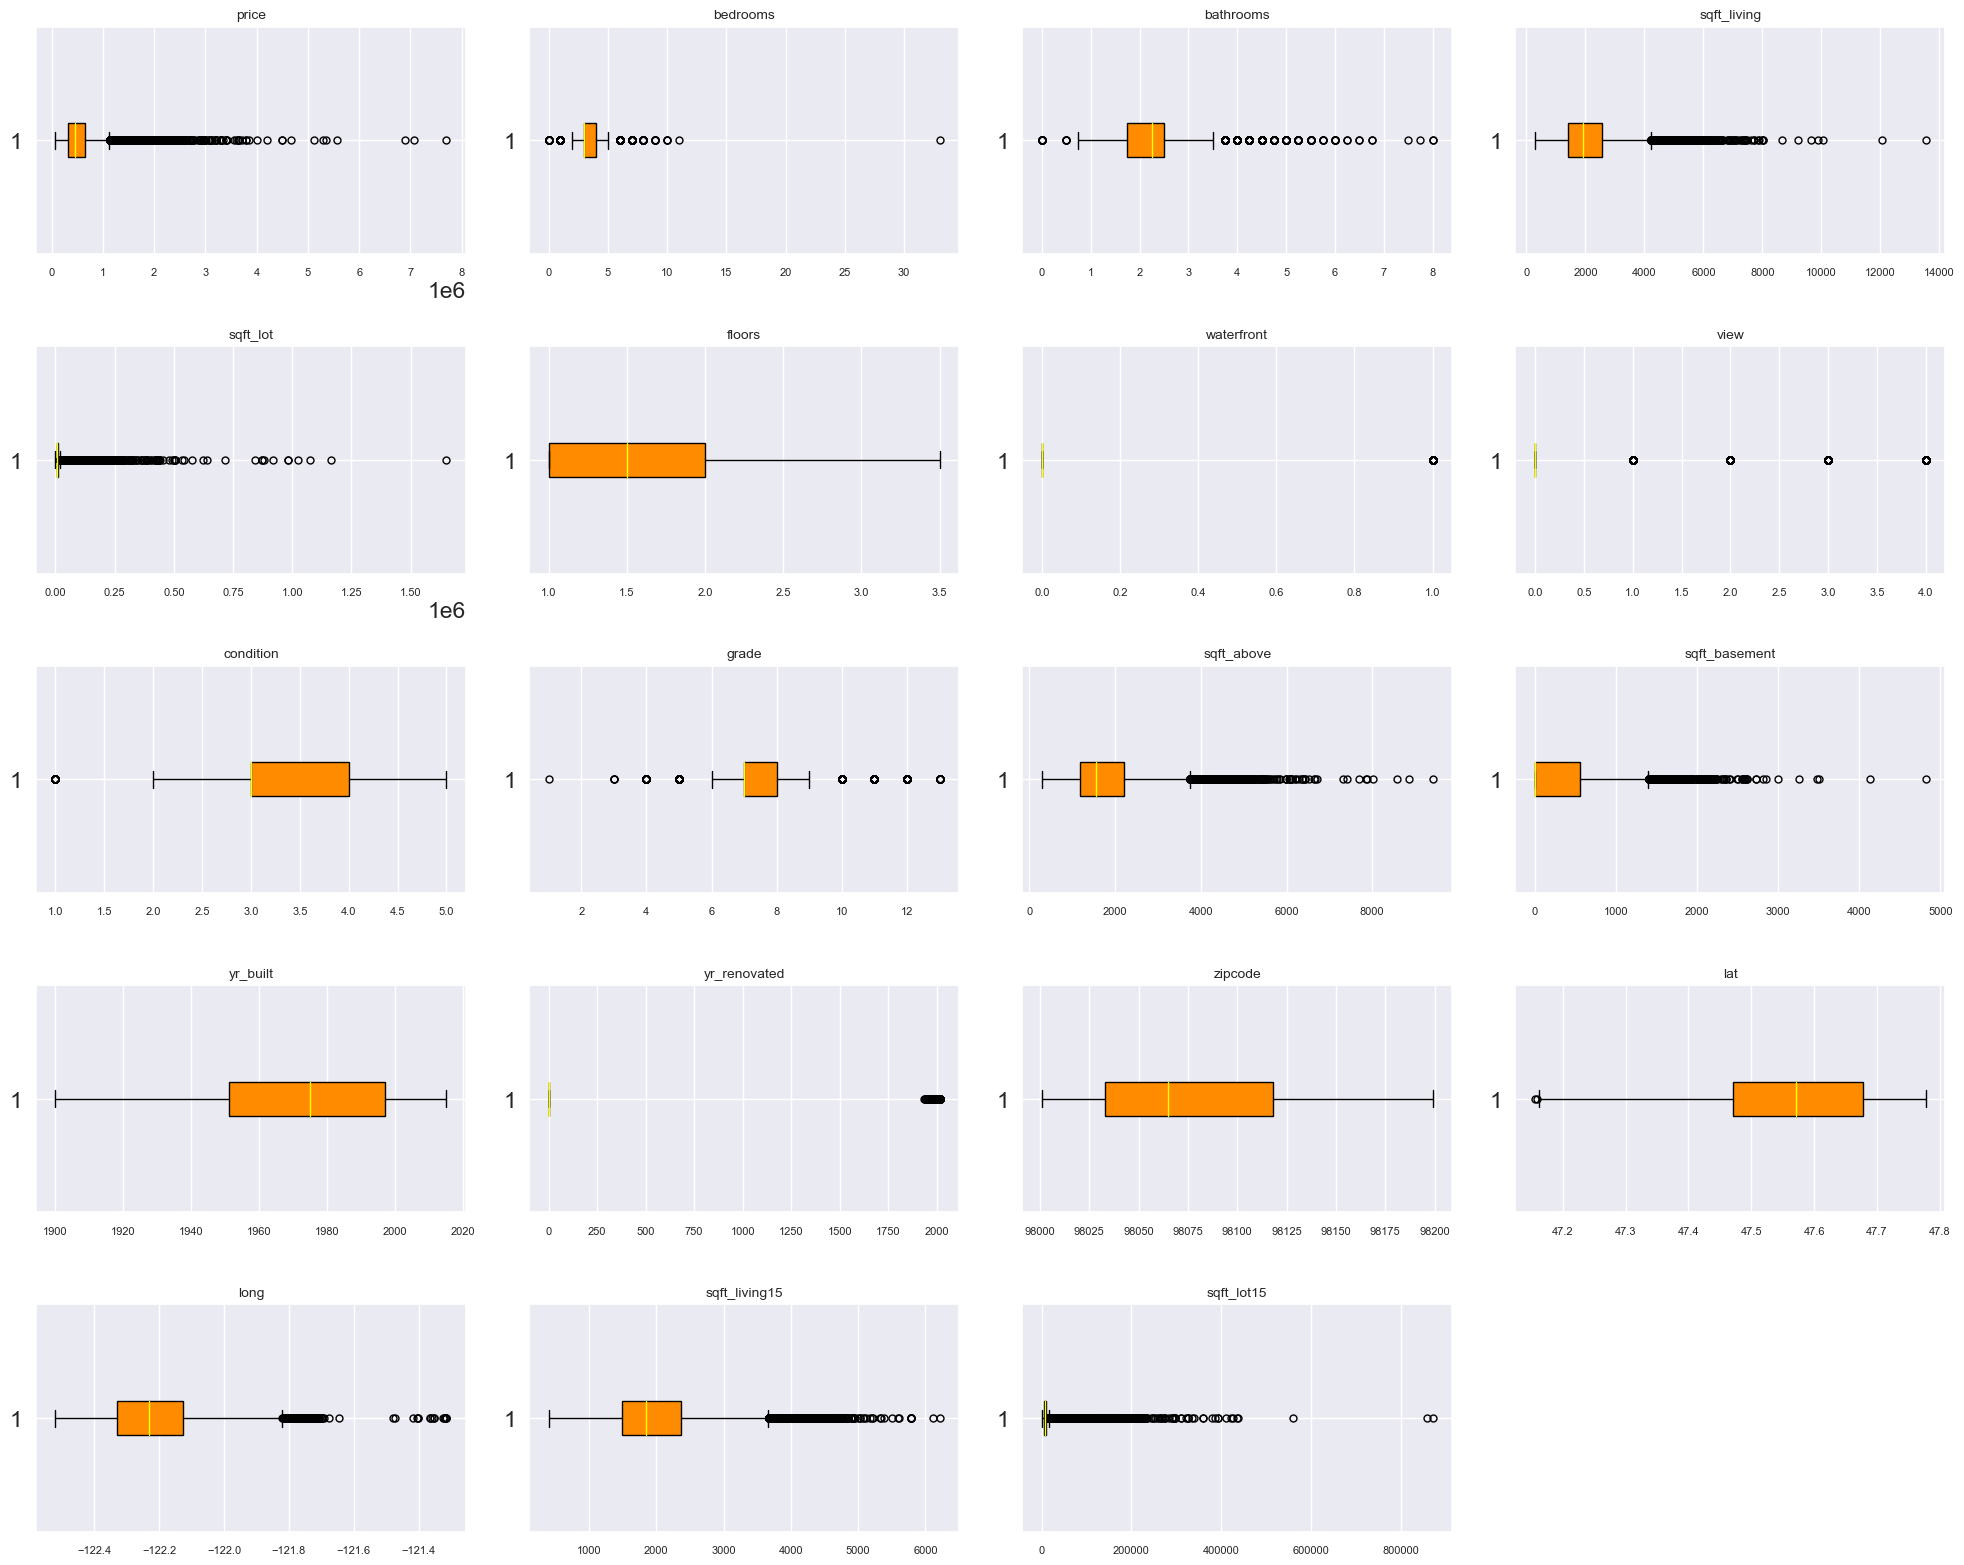

In [508]:
# Checking Outliers
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

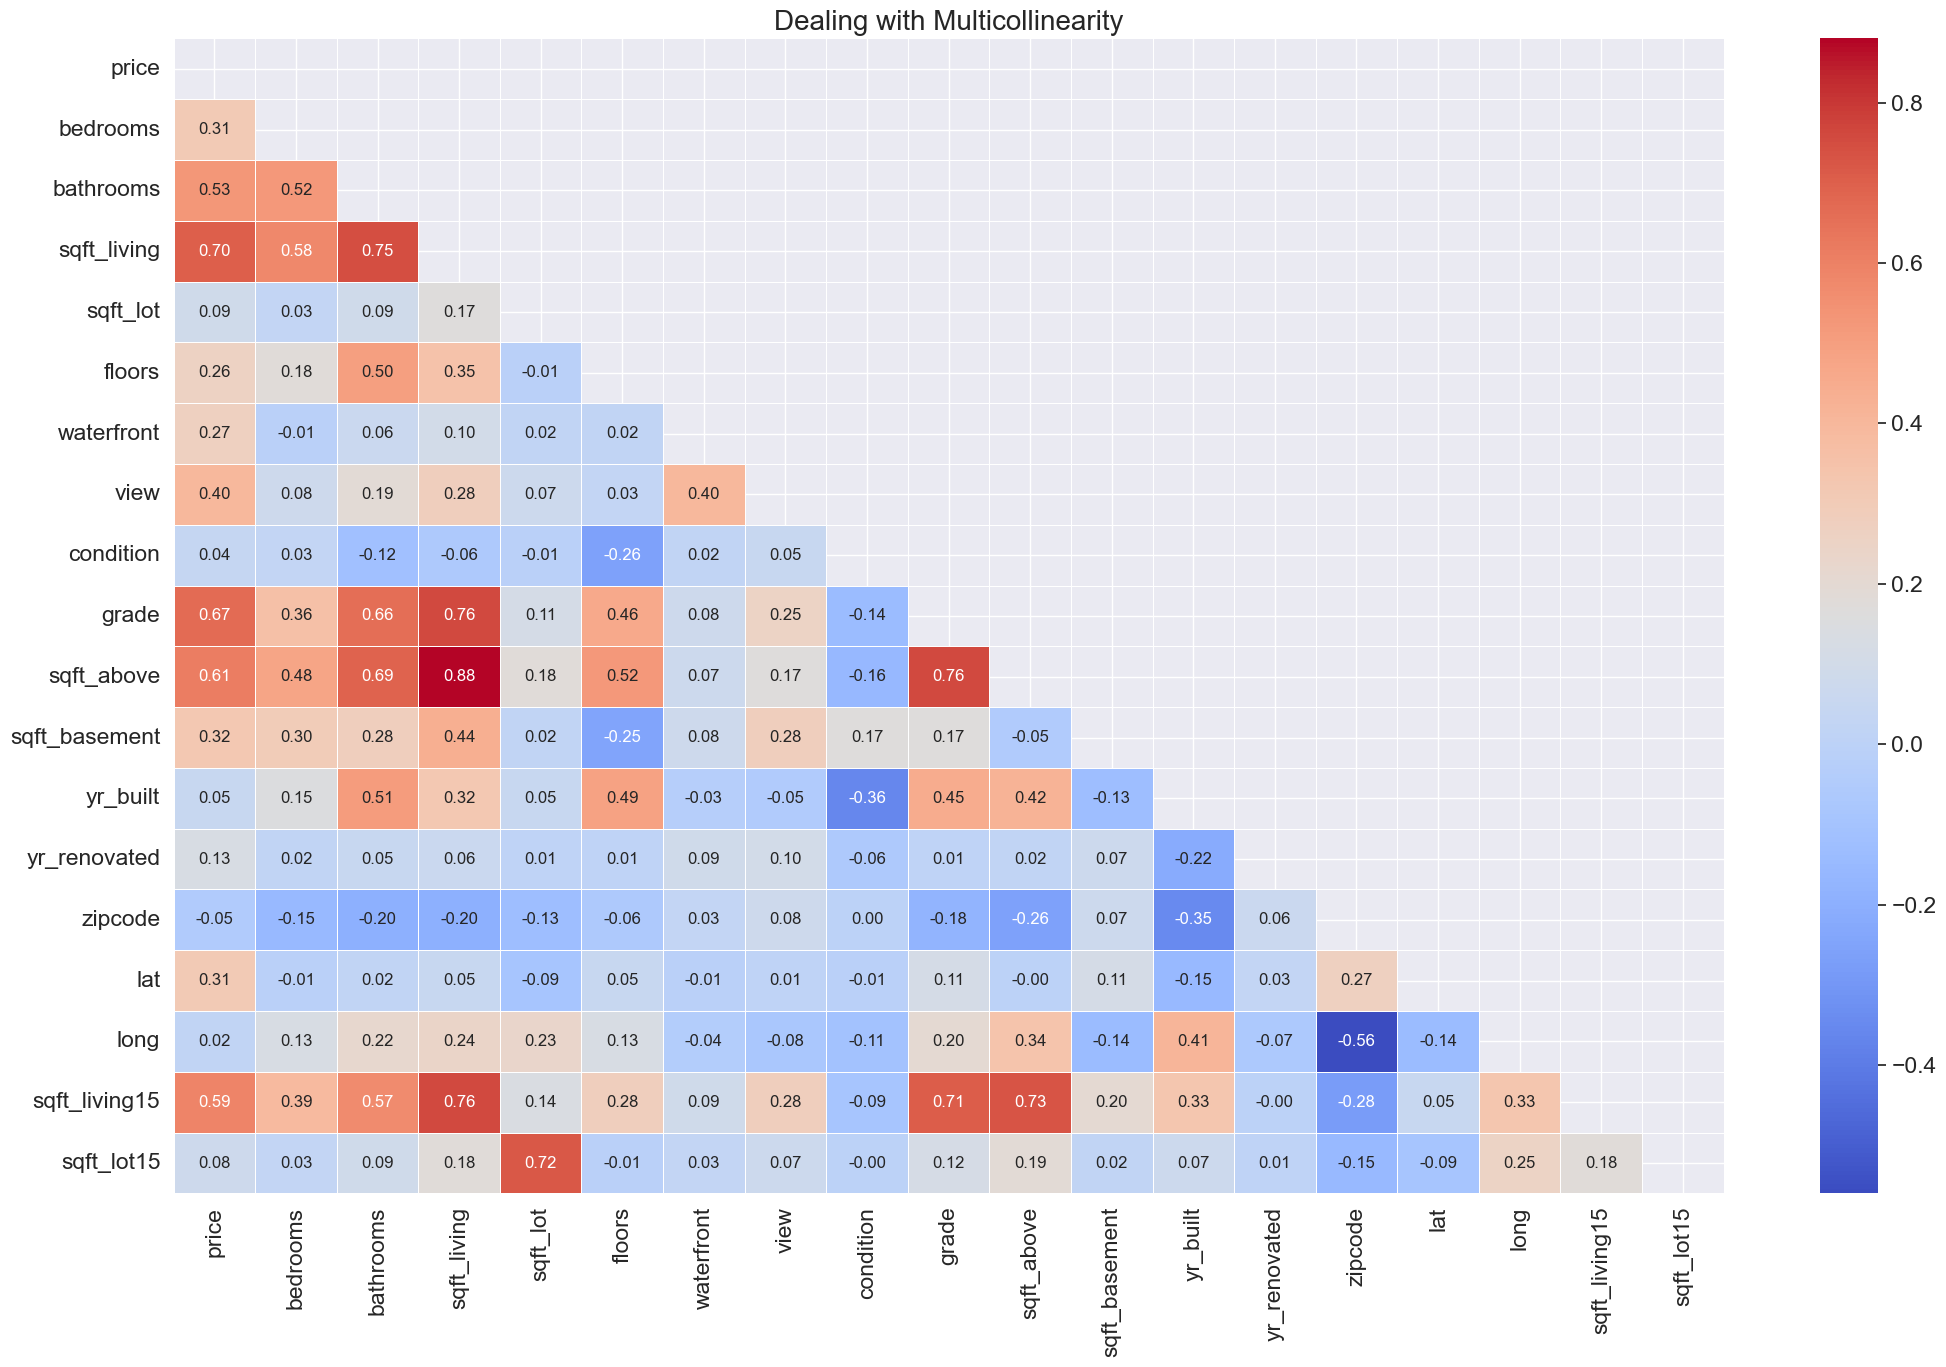

In [509]:
# Checking Multicollinearity
num_corr = round(df.corr(), 2)

# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [510]:
#X-y split
X = df.drop("price", axis=1)
y = df["price"]

In [511]:
#Train_Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [512]:
print(f'100% of our data: {len(df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 21613.
70% for training data: 15129.
30% for test data: 6484.


In [513]:
#Linear regression
# Train the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [514]:
#Model validation
# Make predictions on the test dataset
predictions = model.predict(X_test)
predictions

array([ 458597.06764176,  748993.75994828, 1243303.75799055, ...,
        378358.01428258,  814280.5596961 ,  582157.52856974])

In [515]:
# Make a dataframe to compare
eval_df = pd.DataFrame({"actual":y_test,"pred":predictions})
eval_df

,actual,pred
date_format,,
2014-10-06,365000.00,458597.07
2014-08-21,865000.00,748993.76
2014-08-15,1038000.00,1243303.76
2015-03-31,1490000.00,1665116.95
2014-07-14,711000.00,737302.06
...,...,...
2014-12-03,412000.00,522669.38
2015-04-07,760000.00,656566.44
2014-10-23,410500.00,378358.01


In [516]:
eval_df["dif"] = abs(eval_df["actual"]-eval_df["pred"])
eval_df.head()

,actual,pred,dif
date_format,,,
2014-10-06,365000.00,458597.07,93597.07
2014-08-21,865000.00,748993.76,116006.24
2014-08-15,1038000.00,1243303.76,205303.76
2015-03-31,1490000.00,1665116.95,175116.95
2014-07-14,711000.00,737302.06,26302.06


In [517]:
mae = np.mean(eval_df["dif"])
mae

127486.80255716333

In [518]:
#Metric
r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

In [519]:
#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE =  ", round(MSE_3, 4)) 
print("MAE = ", round(MAE_3, 4))

R2 =  0.6995
RMSE =  208296.7277
MSE =   43387526779.3577
MAE =  127486.8026


In [520]:
#Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [521]:
#model validation
predictions_ridge = ridge.predict(X_test)

In [522]:
#Metrics
r2_3_2 = r2_score(y_test, predictions_ridge)
RMSE_3_2 = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_3_2 = mean_squared_error(y_test, predictions_ridge)
MAE_3_2 = mean_absolute_error(y_test, predictions_ridge)

In [523]:
#Printing the results
print("R2 = ", round(r2_3_2, 4))
print("RMSE = ", round(RMSE_3_2, 4))
print("The value of the metric MSE is ", round(MSE_3_2, 4))
print("MAE = ", round(MAE_3_2, 4))

R2 =  0.6994
RMSE =  208329.8193
The value of the metric MSE is  43401313591.117
MAE =  127479.648


In [524]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [525]:
#model validation
predictions_lasso = lasso.predict(X_test)

In [526]:
r2_3_3 = r2_score(y_test, predictions_lasso)
RMSE_3_3 = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_3_3 = mean_squared_error(y_test, predictions_lasso)
MAE_3_3 = mean_absolute_error(y_test, predictions_lasso)

In [527]:
#Printing the results
print("R2 = ", round(r2_3_3, 4))
print("RMSE = ", round(RMSE_3_3, 4))
print("The value of the metric MSE is ", round(MSE_3_3, 4))
print("MAE = ", round(MAE_3_3, 4))

R2 =  0.6995
RMSE =  208297.9015
The value of the metric MSE is  43388015761.7388
MAE =  127486.3114


In [528]:
#Decision tree regression
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [529]:
predictions_tree = tree.predict(X_test)

In [530]:
#Metrics
r2_3_4 = r2_score(y_test, predictions_tree)
RMSE_3_4 = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_3_4 = mean_squared_error(y_test, predictions_tree)
MAE_3_4 = mean_absolute_error(y_test, predictions_tree)

In [531]:
#Printing the results
print("R2 = ", round(r2_3_4, 4))
print("RMSE = ", round(RMSE_3_4, 4))
print("The value of the metric MSE is ", round(MSE_3_4, 4))
print("MAE = ", round(MAE_3_4, 4))

R2 =  0.7188
RMSE =  201501.2308
The value of the metric MSE is  40602746024.193
MAE =  101916.5796


In [532]:
#KNN regression
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [533]:
predictions_knn = knn.predict(X_test)

In [534]:
r2_3_5 = r2_score(y_test, predictions_knn)
RMSE_3_5 = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_3_5 = mean_squared_error(y_test, predictions_knn)
MAE_3_5 = mean_absolute_error(y_test, predictions_knn)

In [535]:
#Printing the results
print("R2 = ", round(r2_3_5, 4))
print("RMSE = ", round(RMSE_3_5, 4))
print("The value of the metric MSE is ", round(MSE_3_5, 4))
print("MAE = ", round(MAE_3_5, 4))

R2 =  0.4932
RMSE =  270494.6915
The value of the metric MSE is  73167378121.667
MAE =  164982.8079


In [536]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [537]:
predictions_xgb = xgbr.predict(X_test)

In [538]:
r2_3_6 = r2_score(y_test, predictions_xgb)
RMSE_3_6 = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_3_6 = mean_squared_error(y_test, predictions_xgb)
MAE_3_6 = mean_absolute_error(y_test, predictions_xgb)

In [539]:
#Printing the results
print("R2 = ", round(r2_3_6, 4))
print("RMSE = ", round(RMSE_3_6, 4))
print("The value of the metric MSE is ", round(MSE_3_6, 4))
print("MAE = ", round(MAE_3_6, 4))

R2 =  0.7671
RMSE =  183347.2825
The value of the metric MSE is  33616225987.4677
MAE =  100507.1812


### Comparison of models

In [540]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [r2_3, r2_3_2, r2_3_3, r2_3_4, r2_3_5, r2_3_6],
    'RMSE': [RMSE_3, RMSE_3_2, RMSE_3_3, RMSE_3_4, RMSE_3_5, RMSE_3_6],
    'MSE': [MSE_3, MSE_3_2, MSE_3_3, MSE_3_4, MSE_3_5, MSE_3_6],
    'MAE': [MAE_3, MAE_3_2, MAE_3_3, MAE_3_4, MAE_3_5, MAE_3_6]
}

In [541]:
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model").T
pd.options.display.float_format = '{:.2f}'.format
df_metrics

,Model,R²,RMSE,MSE,MAE
0,Linear Regression,0.70,208296.73,43387526779.36,127486.80
1,Ridge,0.70,208329.82,43401313591.12,127479.65
2,Lasso,0.70,208297.90,43388015761.74,127486.31
3,Decision Tree,0.72,201501.23,40602746024.19,101916.58
4,KNN,0.49,270494.69,73167378121.67,164982.81
5,XGBoost,0.77,183347.28,33616225987.47,100507.18


### Normalization with MinMaxScaler

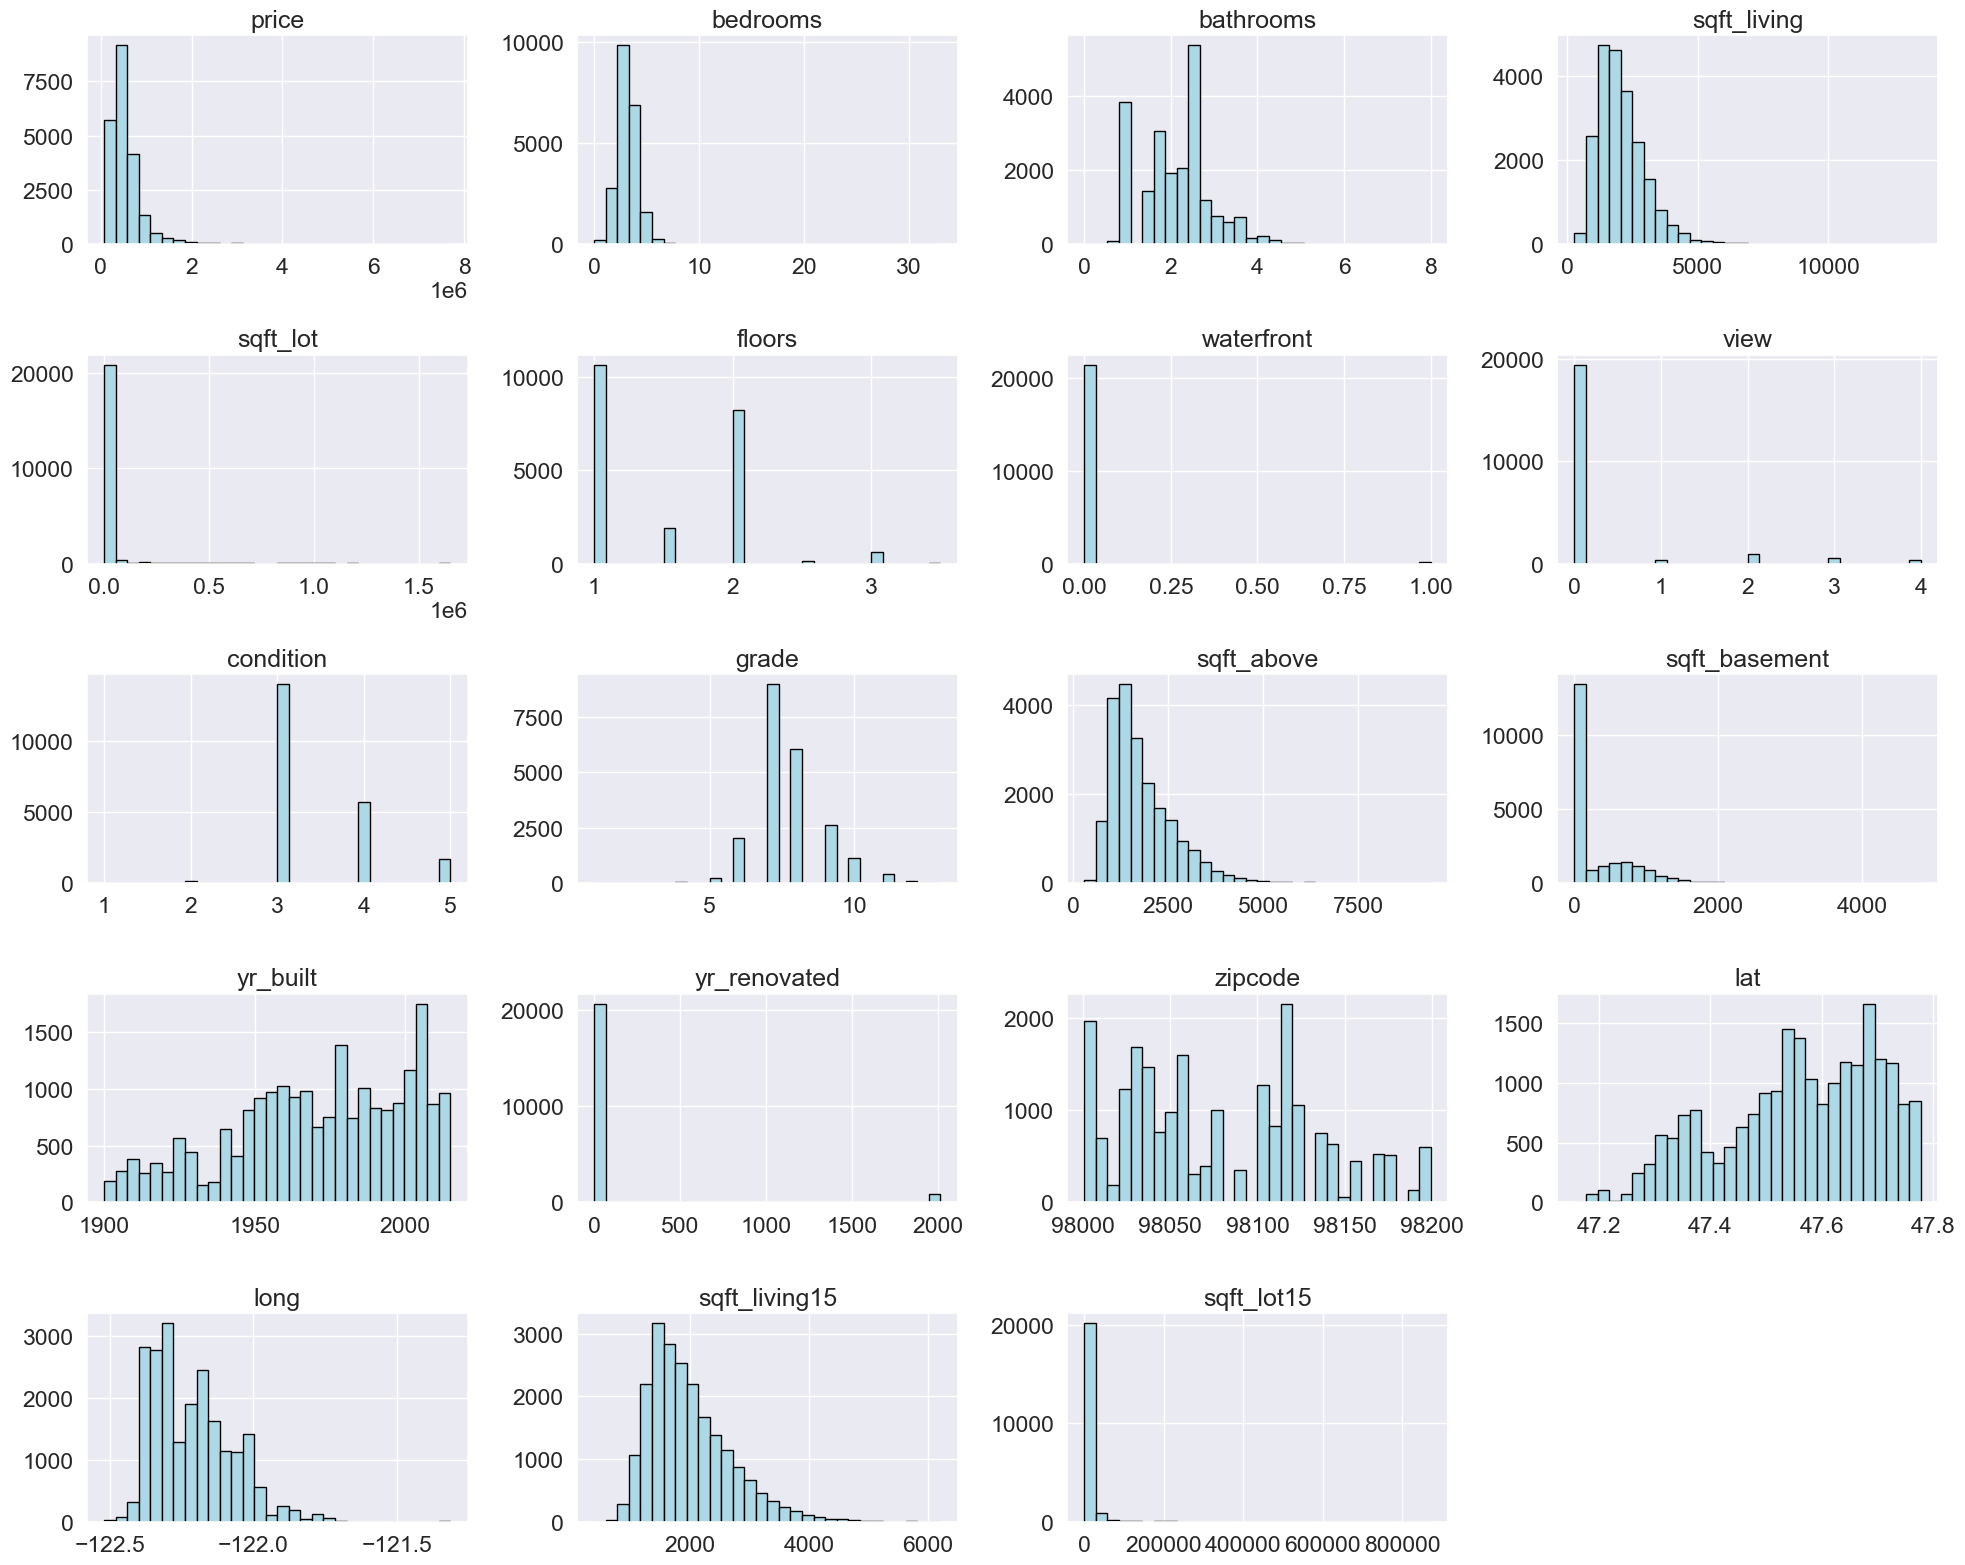

In [542]:
#Noramlization with MinMax Scale
color = '#ADD8E6'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

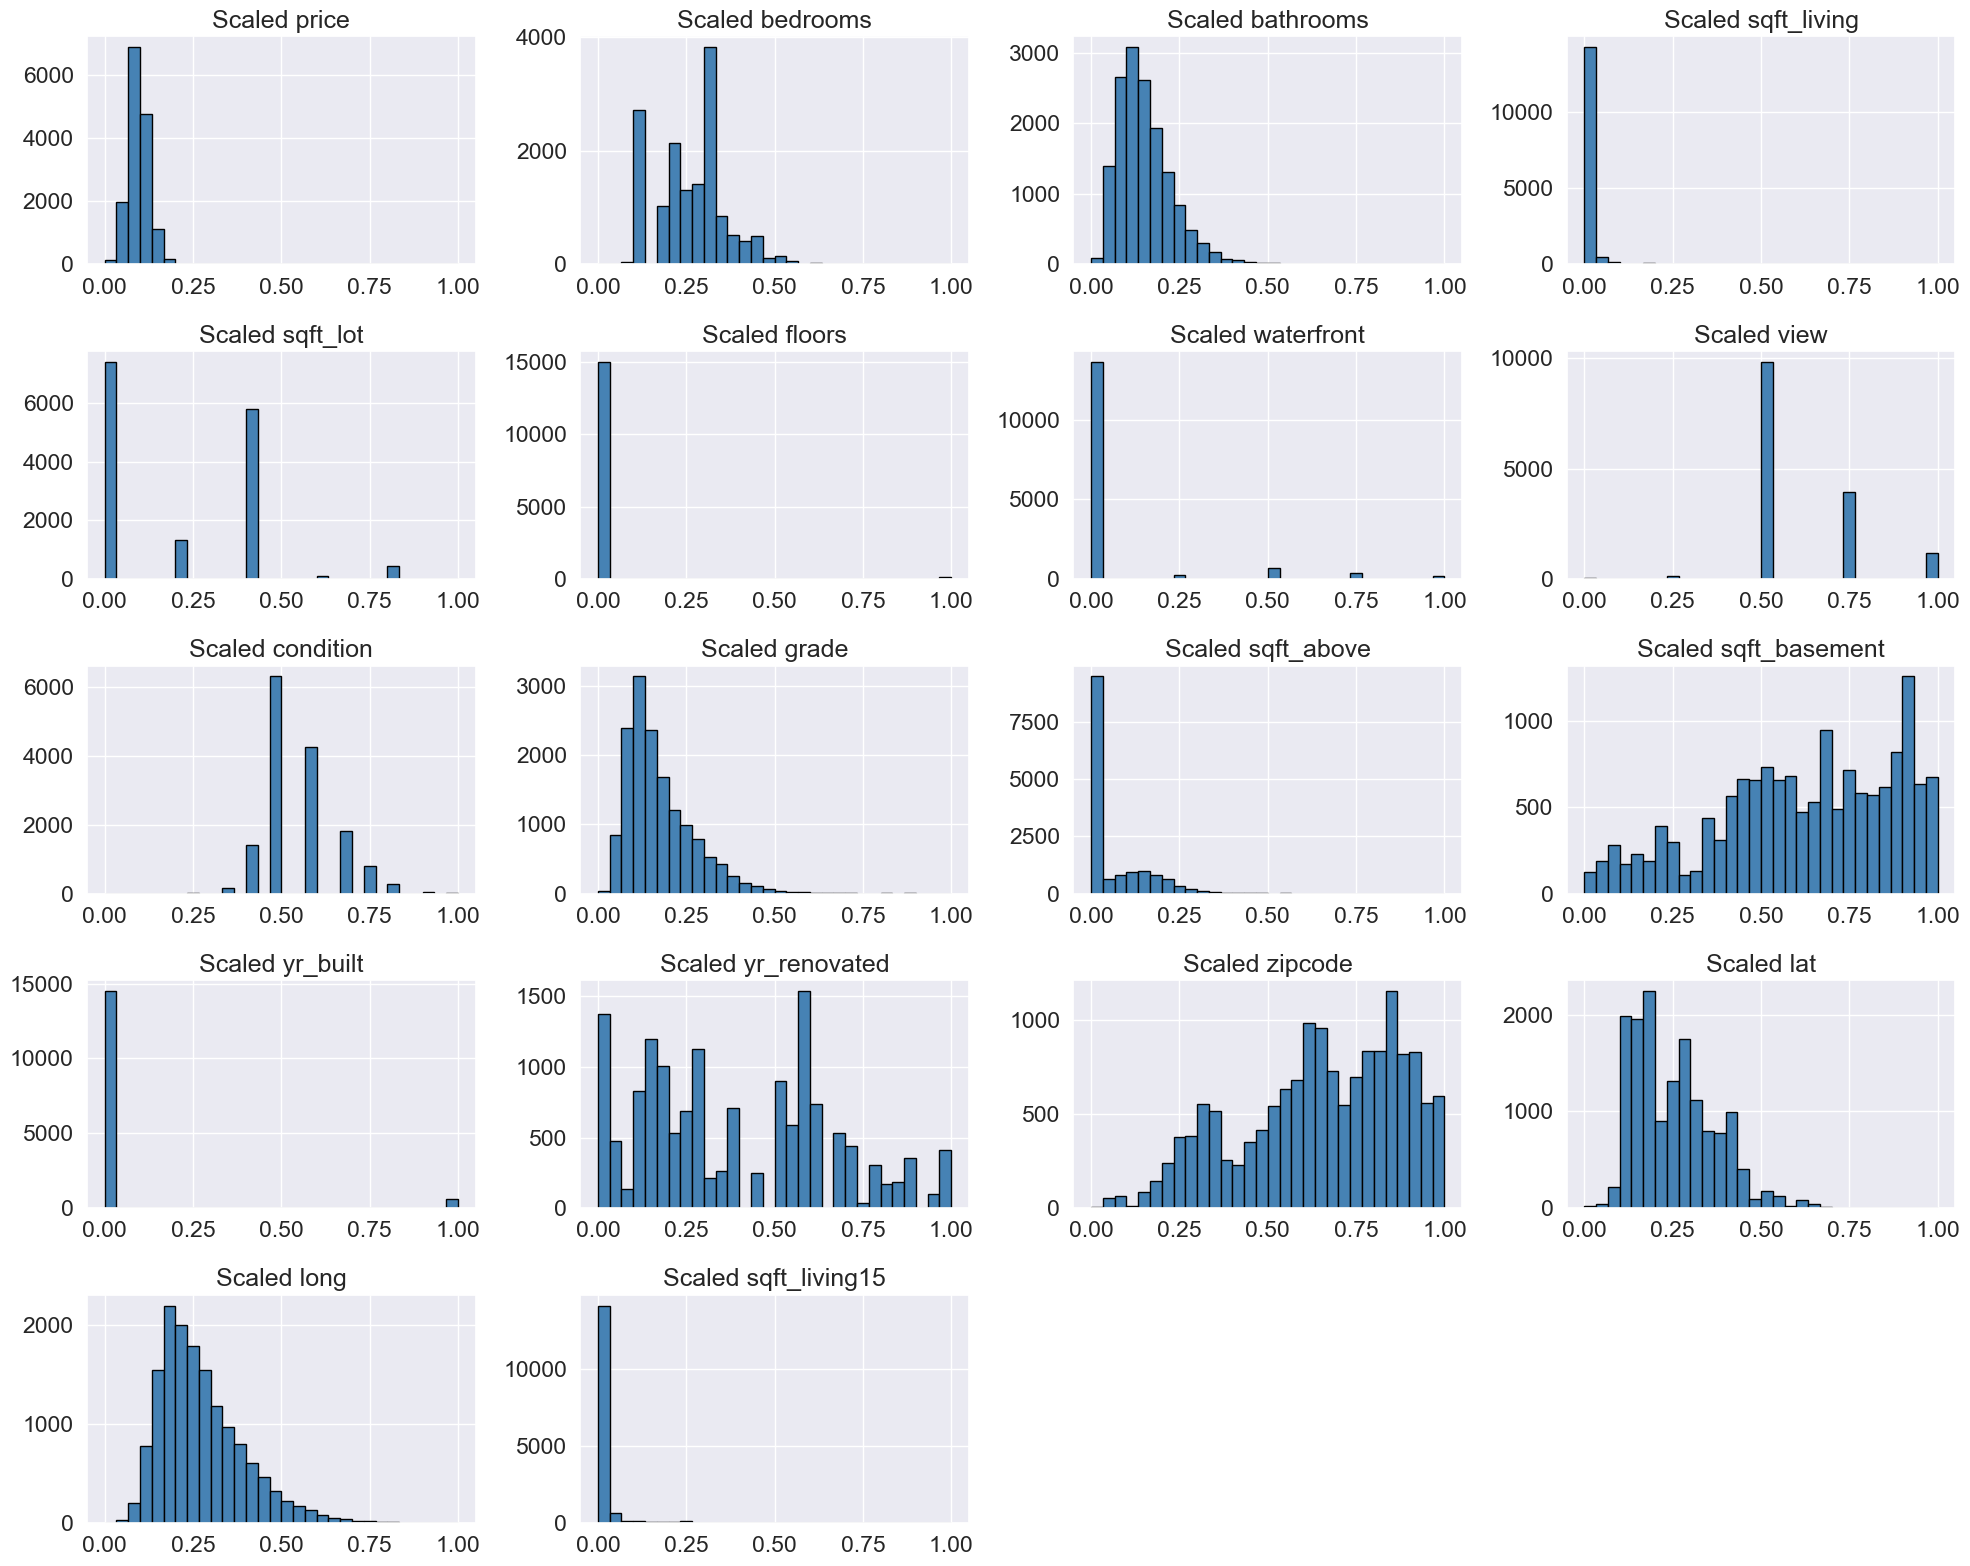

In [543]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


color = '#4682B4'

nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= X_train_scaled.shape[1]:
        ax.set_visible(False)
        continue
    ax.hist(X_train_scaled[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(f'Scaled {df.columns[i]}')

plt.tight_layout()
plt.show()

In [544]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled, y_train)

predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [545]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8648
RMSE =  139728.8886
The value of the metric MSE is  19524162300.0545
MAE =  72134.1432


### Normalization with StandardScaler

In [546]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [547]:
xgbr.fit(X_train_scaled, y_train)
predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [548]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8648
RMSE =  139728.8886
The value of the metric MSE is  19524162300.0545
MAE =  72134.1432


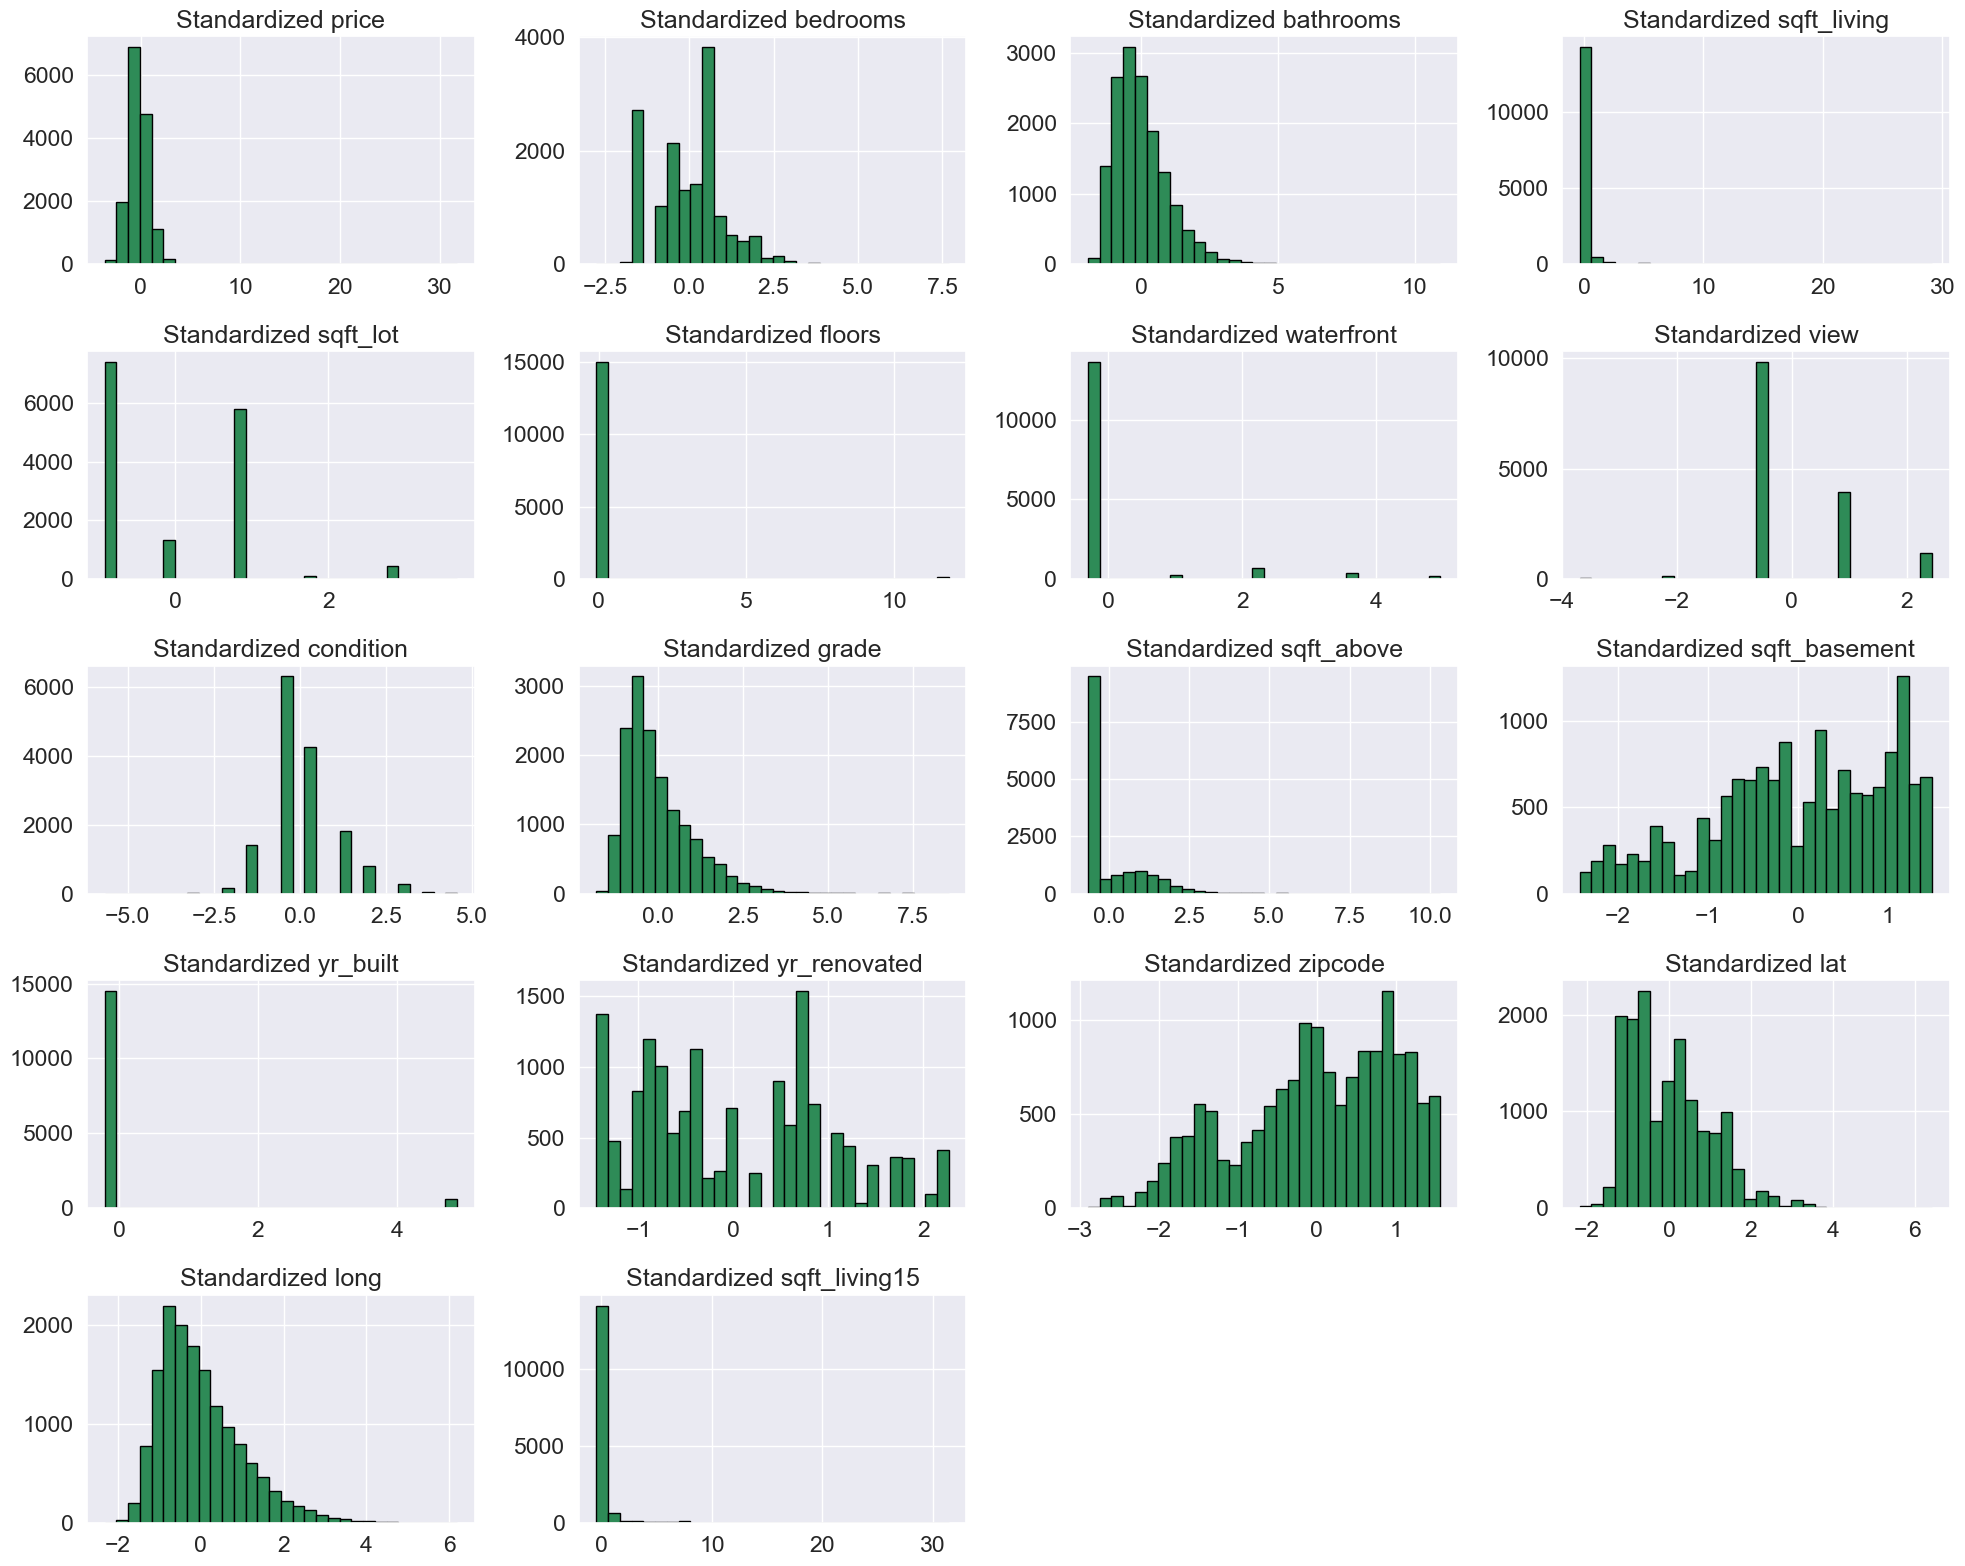

In [549]:
color = '#2E8B57'

nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= X_train_scaled.shape[1]:
        ax.set_visible(False)
        continue
    ax.hist(X_train_scaled[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(f'Standardized {df.columns[i]}')

plt.tight_layout()
plt.show()

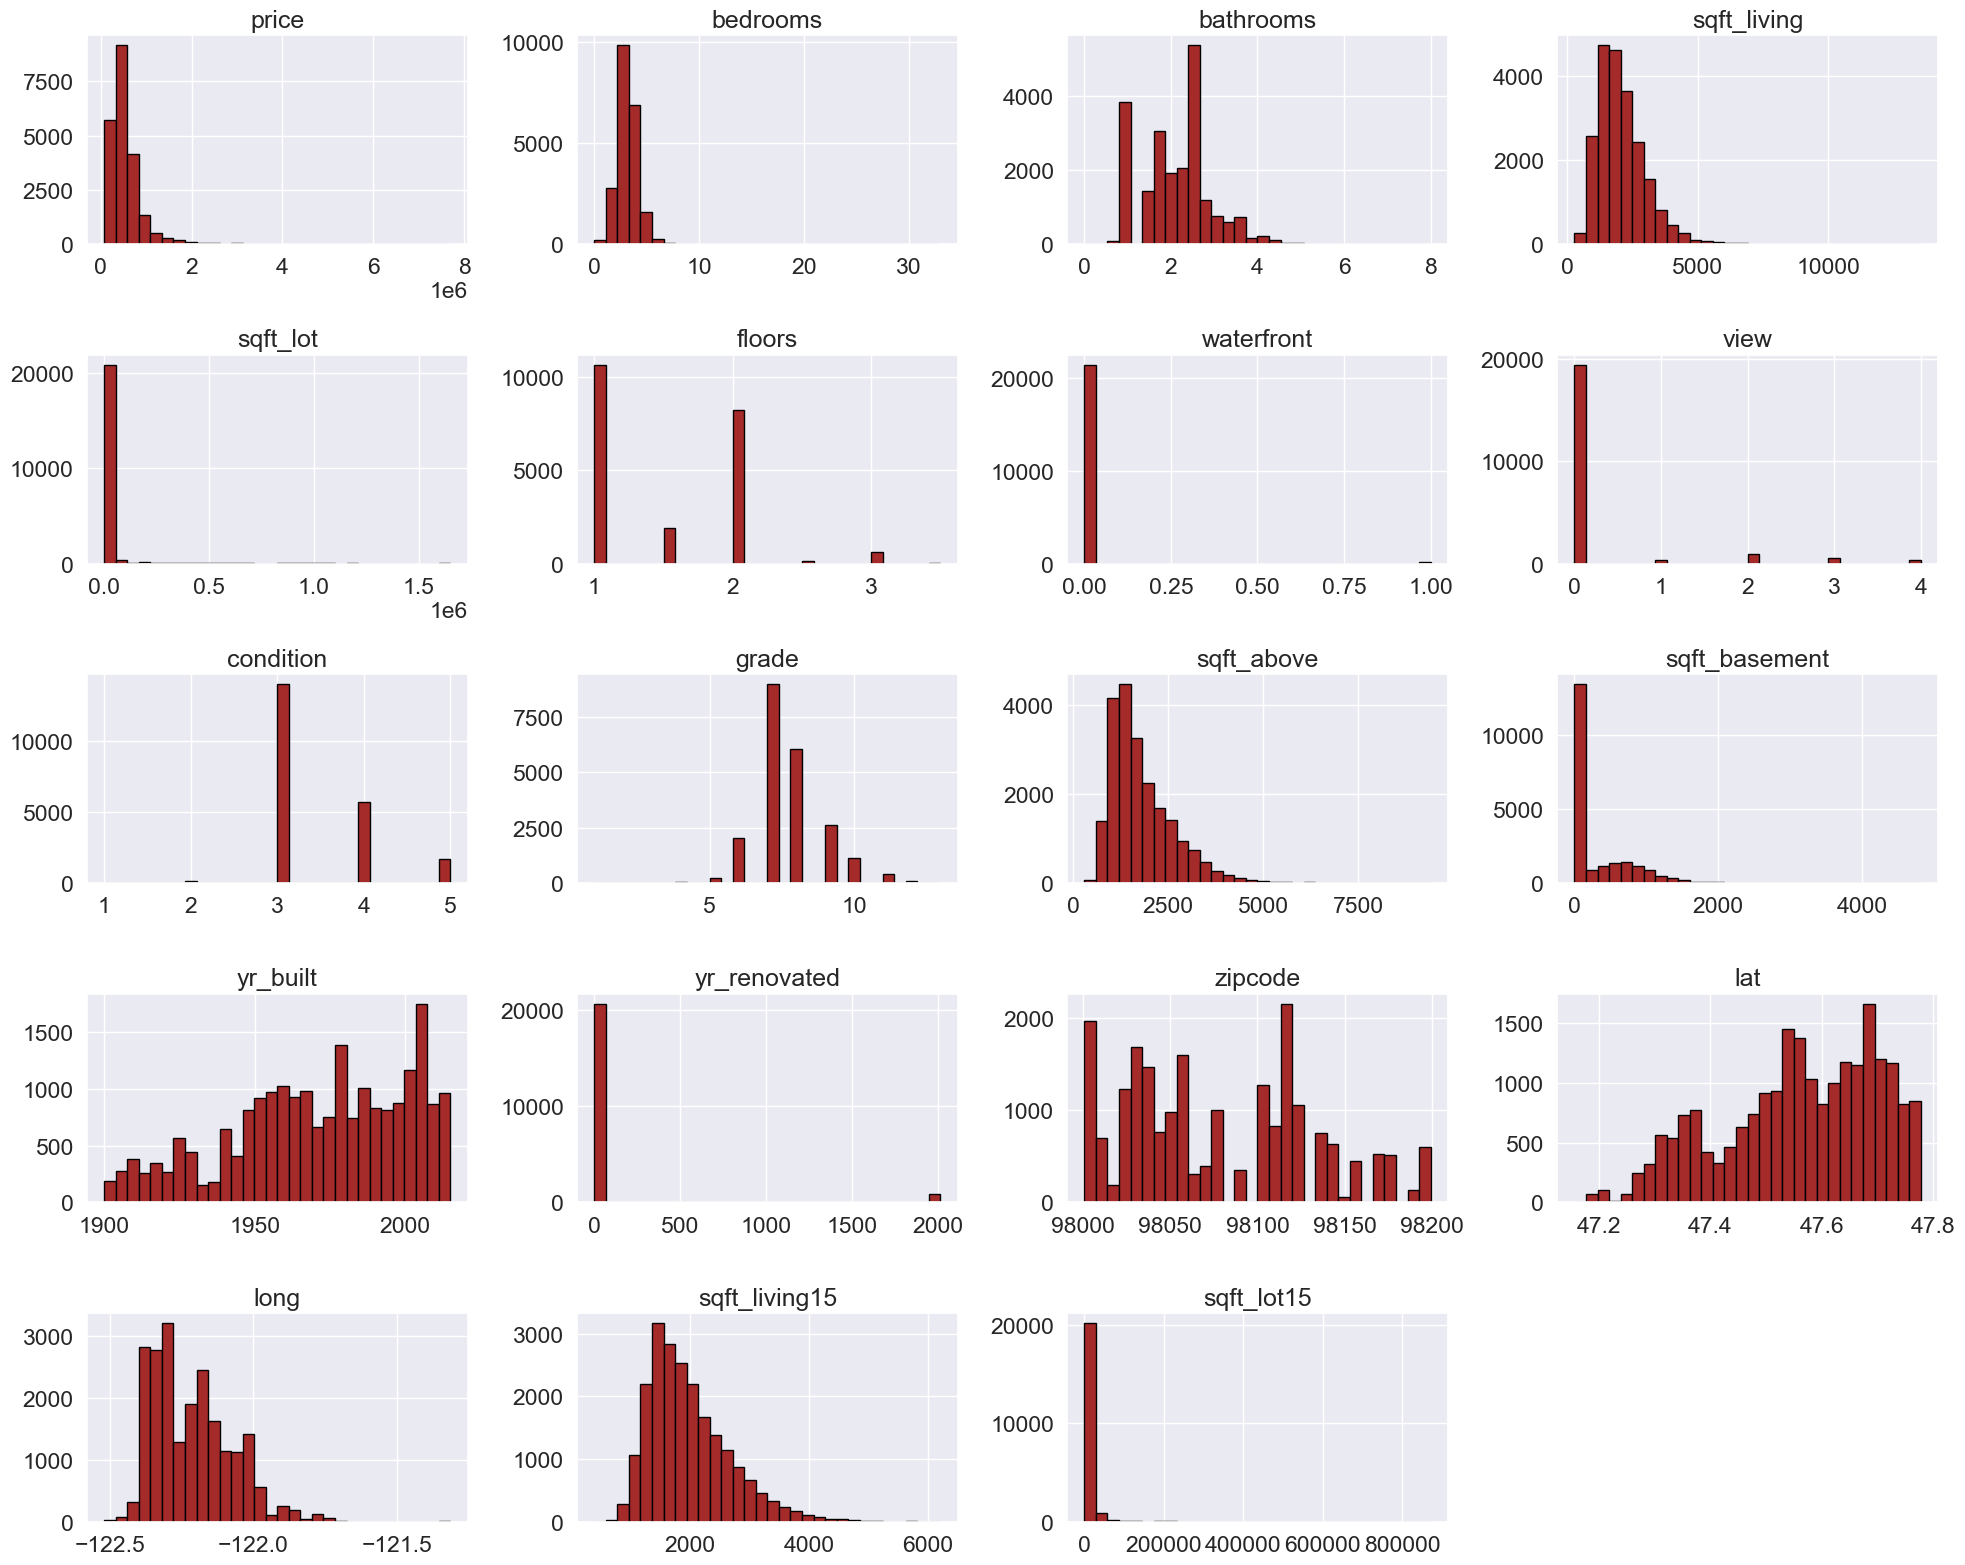

In [550]:
color = '#A52A2A'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

### Normalization with log Transform

In [551]:
#Normalization with log Transform
X_train_log = np.log1p(X_train)  # np.log1p is useful to handle zero values in your data
X_test_log = np.log1p(X_test)

In [552]:
xgbr.fit(X_train_log, y_train)
predictions_xgb_2 = xgbr.predict(X_test_log)

In [553]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8296
RMSE =  156831.3136
The value of the metric MSE is  24596060928.1037
MAE =  74258.7395


In [554]:
#Improving it droppign multicollinearity features
df.corrwith(df["price"]).sort_values(ascending=False)

price            1.00
sqft_living      0.70
grade            0.67
sqft_above       0.61
sqft_living15    0.59
bathrooms        0.53
view             0.40
sqft_basement    0.32
bedrooms         0.31
lat              0.31
waterfront       0.27
floors           0.26
yr_renovated     0.13
sqft_lot         0.09
sqft_lot15       0.08
yr_built         0.05
condition        0.04
long             0.02
zipcode         -0.05
dtype: float64

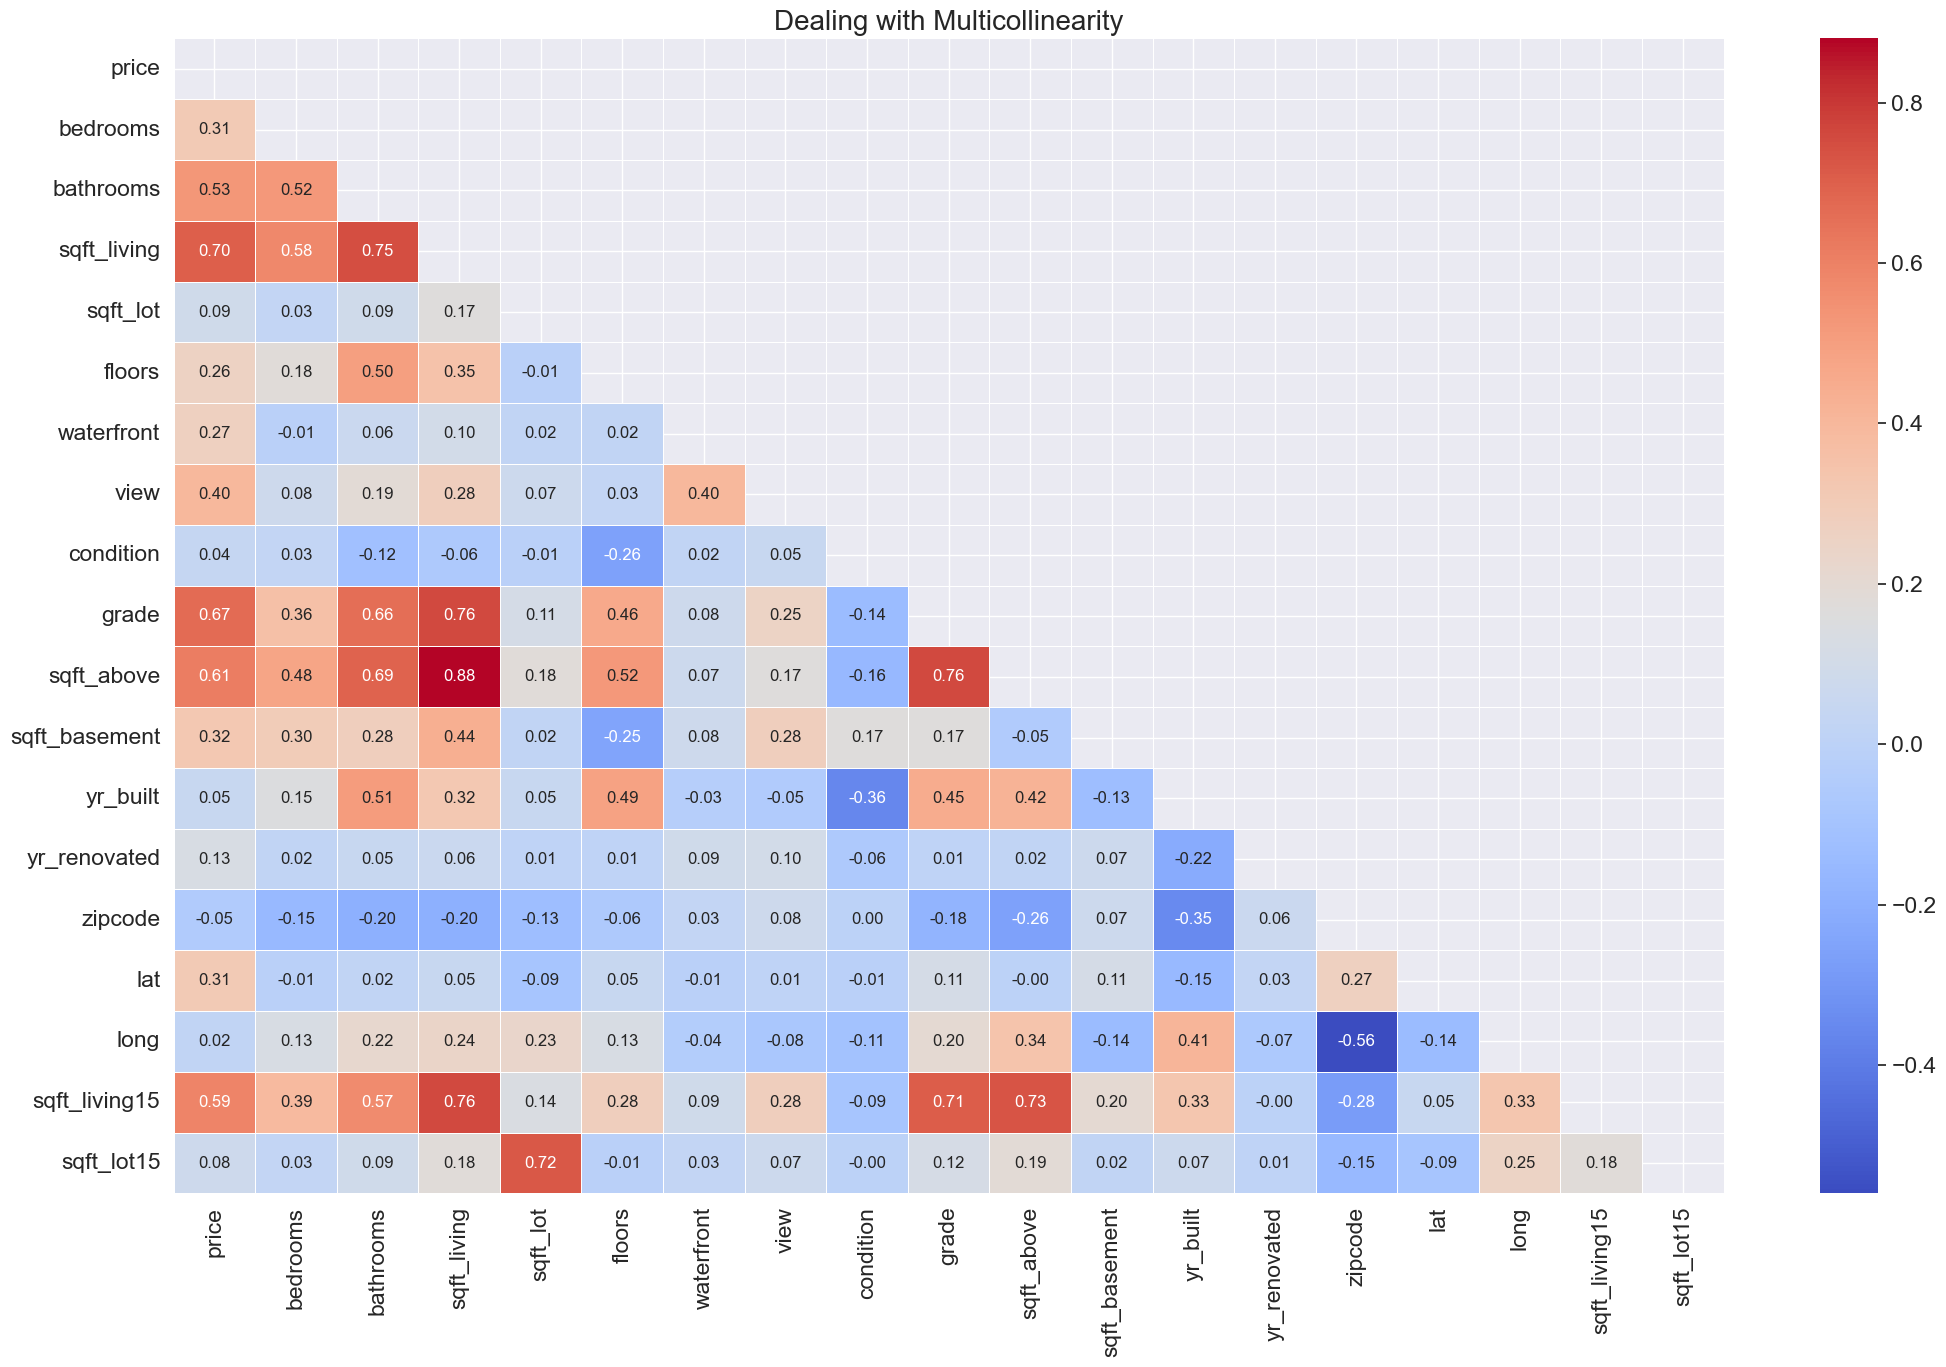

In [555]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [556]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [557]:
df.shape

(21613, 19)

In [558]:
#Log transfer
X_train_log = np.log1p(X_train)  # np.log1p is useful to handle zero values in your data
X_test_log = np.log1p(X_test)

In [559]:
xgbr.fit(X_train_log, y_train)
predictions_xgb_2 = xgbr.predict(X_test_log)

In [560]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8296
RMSE =  156831.3136
The value of the metric MSE is  24596060928.1037
MAE =  74258.7395


In [561]:
# Dealing with outliers
def outlier_slayer(data): 
    """
    Automatically removes outliers based on Q1, Q3
    """
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [562]:
# Reporting
eval_df

,actual,pred,dif
date_format,,,
2014-10-06,365000.00,458597.07,93597.07
2014-08-21,865000.00,748993.76,116006.24
2014-08-15,1038000.00,1243303.76,205303.76
2015-03-31,1490000.00,1665116.95,175116.95
2014-07-14,711000.00,737302.06,26302.06
...,...,...,...
2014-12-03,412000.00,522669.38,110669.38
2015-04-07,760000.00,656566.44,103433.56
2014-10-23,410500.00,378358.01,32141.99


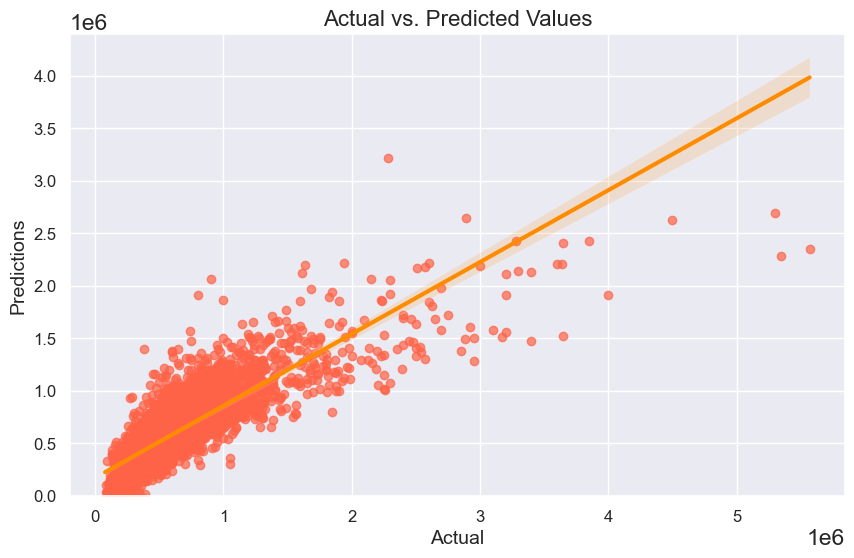

In [563]:
scatter_color = "#FF6347"
line_color = "#FF8C00"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='pred', data=eval_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [564]:
#Comparison of metrics with different models
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [r2_3, r2_3_2, r2_3_3, r2_3_4, r2_3_5, r2_3_6],
    'RMSE': [RMSE_3, RMSE_3_2, RMSE_3_3, RMSE_3_4, RMSE_3_5, RMSE_3_6],
    'MSE': [MSE_3, MSE_3_2, MSE_3_3, MSE_3_4, MSE_3_5, MSE_3_6],
    'MAE': [MAE_3, MAE_3_2, MAE_3_3, MAE_3_4, MAE_3_5, MAE_3_6]
}

In [565]:
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model").T

Model,Linear Regression,Ridge,Lasso,Decision Tree,KNN,XGBoost
R²,0.70,0.70,0.70,0.72,0.49,0.77
RMSE,208296.73,208329.82,208297.90,201501.23,270494.69,183347.28
MSE,43387526779.36,43401313591.12,43388015761.74,40602746024.19,73167378121.67,33616225987.47
MAE,127486.80,127479.65,127486.31,101916.58,164982.81,100507.18


<h1 style="color: #FF0000;">Models after cleaning dataset by dropping least important predictive features</h1> 

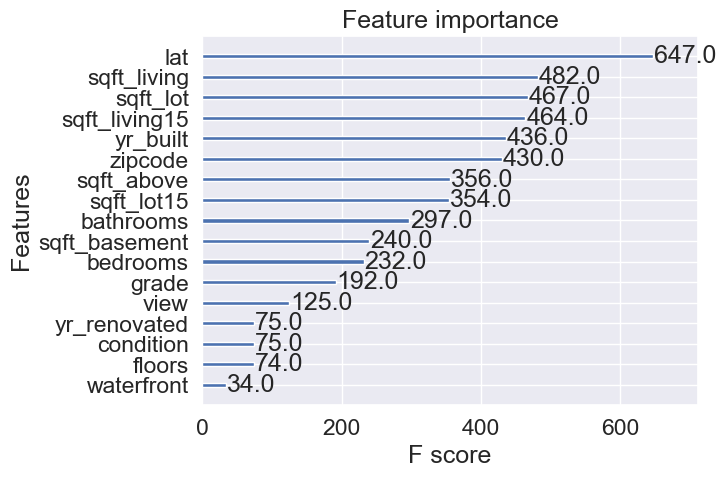

In [566]:
#checking which features has the most importance or contributing the most to the predictions
from xgboost import plot_importance

plot_importance(xgbr, importance_type='weight')
plt.show()

In [567]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [568]:
columns_to_drop = ['sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'sqft_lot15']
df1 = df.drop(columns=columns_to_drop)

In [569]:
df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15'],
      dtype='object')

In [570]:
#Checking correlation with target variable price
corr_matrix = df1.corr()
print(corr_matrix['price'].sort_values(ascending=False))

price            1.00
sqft_living      0.70
sqft_above       0.61
sqft_living15    0.59
bathrooms        0.53
sqft_basement    0.32
bedrooms         0.31
lat              0.31
yr_built         0.05
long             0.02
zipcode         -0.05
Name: price, dtype: float64


<h3 style="color: #FF0000;">Train_test split for cleaned dataset df1</h3> 

In [571]:
#Train_test split for cleaned dataset df1
X = df1.drop(columns=['price'])  # Exclude'price' from X train as is target variable 
y = df1['price']

# Split the cleaned dataset df1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [572]:
print(X_train.columns)
print(X_test.columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15'],
      dtype='object')
Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15'],
      dtype='object')


<h3 style="color: #FF0000;">Ridge Regression</h3> 

In [573]:
#Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [574]:
#model validation
predictions_ridge = ridge.predict(X_test)

In [575]:
#Metrics
r2_r = r2_score(y_test, predictions_ridge)
RMSE_r = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_r = mean_squared_error(y_test, predictions_ridge)
MAE_r = mean_absolute_error(y_test, predictions_ridge)

In [576]:
#Printing the results
print("R2 = ", round(r2_r, 4))
print("RMSE = ", round(RMSE_r, 4))
print("The value of the metric MSE is ", round(MSE_r, 4))
print("MAE = ", round(MAE_r, 4))

R2 =  0.62
RMSE =  239686.8114
The value of the metric MSE is  57449767545.8059
MAE =  145821.9565


#### Comparison to result of Original dataset 

Comparing it to Ridge model of original dataset, metrics are performing lower than Ridge model of original dataset metrics as below

![alt text](image.png)

<h3 style="color: #FF0000;">lasso</h3> 

In [577]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [578]:
#model validation
predictions_lasso = lasso.predict(X_test)

In [579]:
#metrics
r2_l = r2_score(y_test, predictions_lasso)
RMSE_l = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_l = mean_squared_error(y_test, predictions_lasso)
MAE_l = mean_absolute_error(y_test, predictions_lasso)

In [580]:
#Printing the results
print("R2 = ", round(r2_l, 4))
print("RMSE = ", round(RMSE_l, 4))
print("The value of the metric MSE is ", round(MSE_l, 4))
print("MAE = ", round(MAE_l, 4))

R2 =  0.62
RMSE =  239674.9122
The value of the metric MSE is  57444063532.7434
MAE =  145831.6655


#### Comparison to result of Original dataset 

Comparing to Lasso model of original dataset, the new model metrics are permorning worse

![alt text](image.png)

<h3 style="color: #FF0000;">Decision Tree </h3> 

In [581]:
#Decision tree regression
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [582]:
predictions_tree = tree.predict(X_test)

In [583]:
#Metrics
r2_d = r2_score(y_test, predictions_tree)
RMSE_d = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_d = mean_squared_error(y_test, predictions_tree)
MAE_d = mean_absolute_error(y_test, predictions_tree)

In [584]:
#Printing the results
print("R2 = ", round(r2_d, 4))
print("RMSE = ", round(RMSE_d, 4))
print("The value of the metric MSE is ", round(MSE_d, 4))
print("MAE = ", round(MAE_d, 4))

R2 =  0.6706
RMSE =  223160.6275
The value of the metric MSE is  49800665684.8478
MAE =  110686.9098


#### Comparison to result of Original dataset 
Decision tree model metrics are performing worst that the model of original dataset

![alt text](image.png)

<h2 style="color: #FF0000;">Selecting the Model: XGBoost Regression</h2>

In [585]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [586]:
predictions_xgb = xgbr.predict(X_test)

In [587]:
#Metics
r2_3_x = r2_score(y_test, predictions_xgb)
RMSE_3_x = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_3_x = mean_squared_error(y_test, predictions_xgb)
MAE_3_x = mean_absolute_error(y_test, predictions_xgb)

In [588]:
#Printing the results
print("R2 = ", round(r2_3_x, 4))
print("RMSE = ", round(RMSE_3_x, 4))
print("The value of the metric MSE is ", round(MSE_3_x, 4))
print("MAE = ", round(MAE_3_x, 4))

R2 =  0.734
RMSE =  200538.0485
The value of the metric MSE is  40215508911.062
MAE =  104656.1509


#### comparison to the original dataset
xgboost model in the new trained model is performing slightly less with lower R2 and higher errors compared to the original dataset metrics

![alt text](image.png)

In [589]:
#Model validation
# Make a dataframe to compare
eval_df_predictions_xgb = pd.DataFrame({"actual":y_test,"pred":predictions_xgb})
eval_df_predictions_xgb

,actual,pred
date_format,,
2014-10-06,365000.00,412305.69
2014-08-21,865000.00,880860.75
2014-08-15,1038000.00,1008385.12
2015-03-31,1490000.00,2120575.50
2014-07-14,711000.00,697089.56
...,...,...
2014-11-10,338000.00,354717.94
2014-07-08,673000.00,720037.25
2014-10-16,285000.00,350946.00


In [590]:
eval_df_predictions_xgb["dif"] = abs(eval_df_predictions_xgb["actual"]-eval_df_predictions_xgb["pred"])
eval_df_predictions_xgb.head()

,actual,pred,dif
date_format,,,
2014-10-06,365000.00,412305.69,47305.69
2014-08-21,865000.00,880860.75,15860.75
2014-08-15,1038000.00,1008385.12,29614.88
2015-03-31,1490000.00,2120575.50,630575.50
2014-07-14,711000.00,697089.56,13910.44


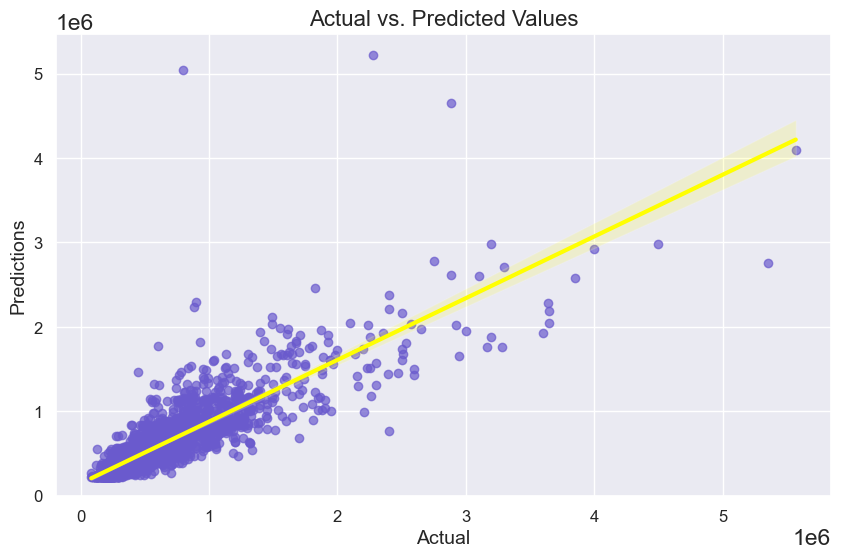

In [591]:
scatter_color = "#6A5ACD"
line_color = "#FFFF00"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='pred', data=eval_df_predictions_xgb,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<h2 style="color: #FF0000;">Improving model</h2>

<h3 style="color: #0000FF;">Normalization with MinMaxScaler</h3> 

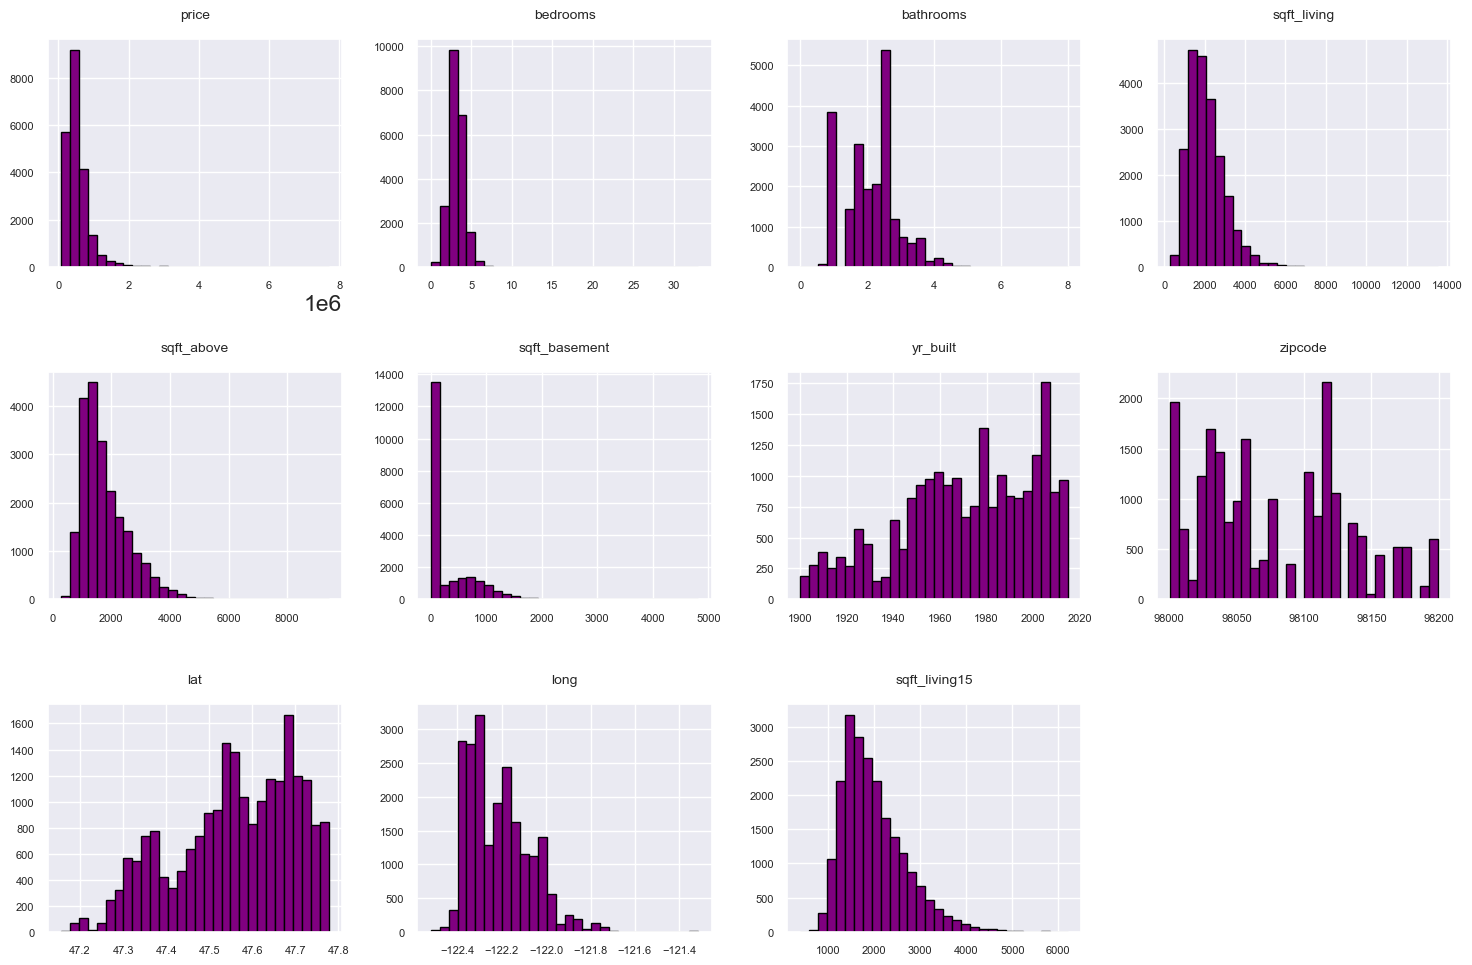

In [592]:
color = '#800080'

# grid size
nrows, ncols = 3, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df1.columns):
        ax.set_visible(False)  # hide unused plots
        continue
    ax.hist(df1.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df1.columns[i], pad=15, fontsize=10)  # Adjust title
    ax.tick_params(axis='x', labelsize=8)  # Adjust x-axis font size
    ax.tick_params(axis='y', labelsize=8)  # Adjust y-axis font size

plt.tight_layout()
plt.show()

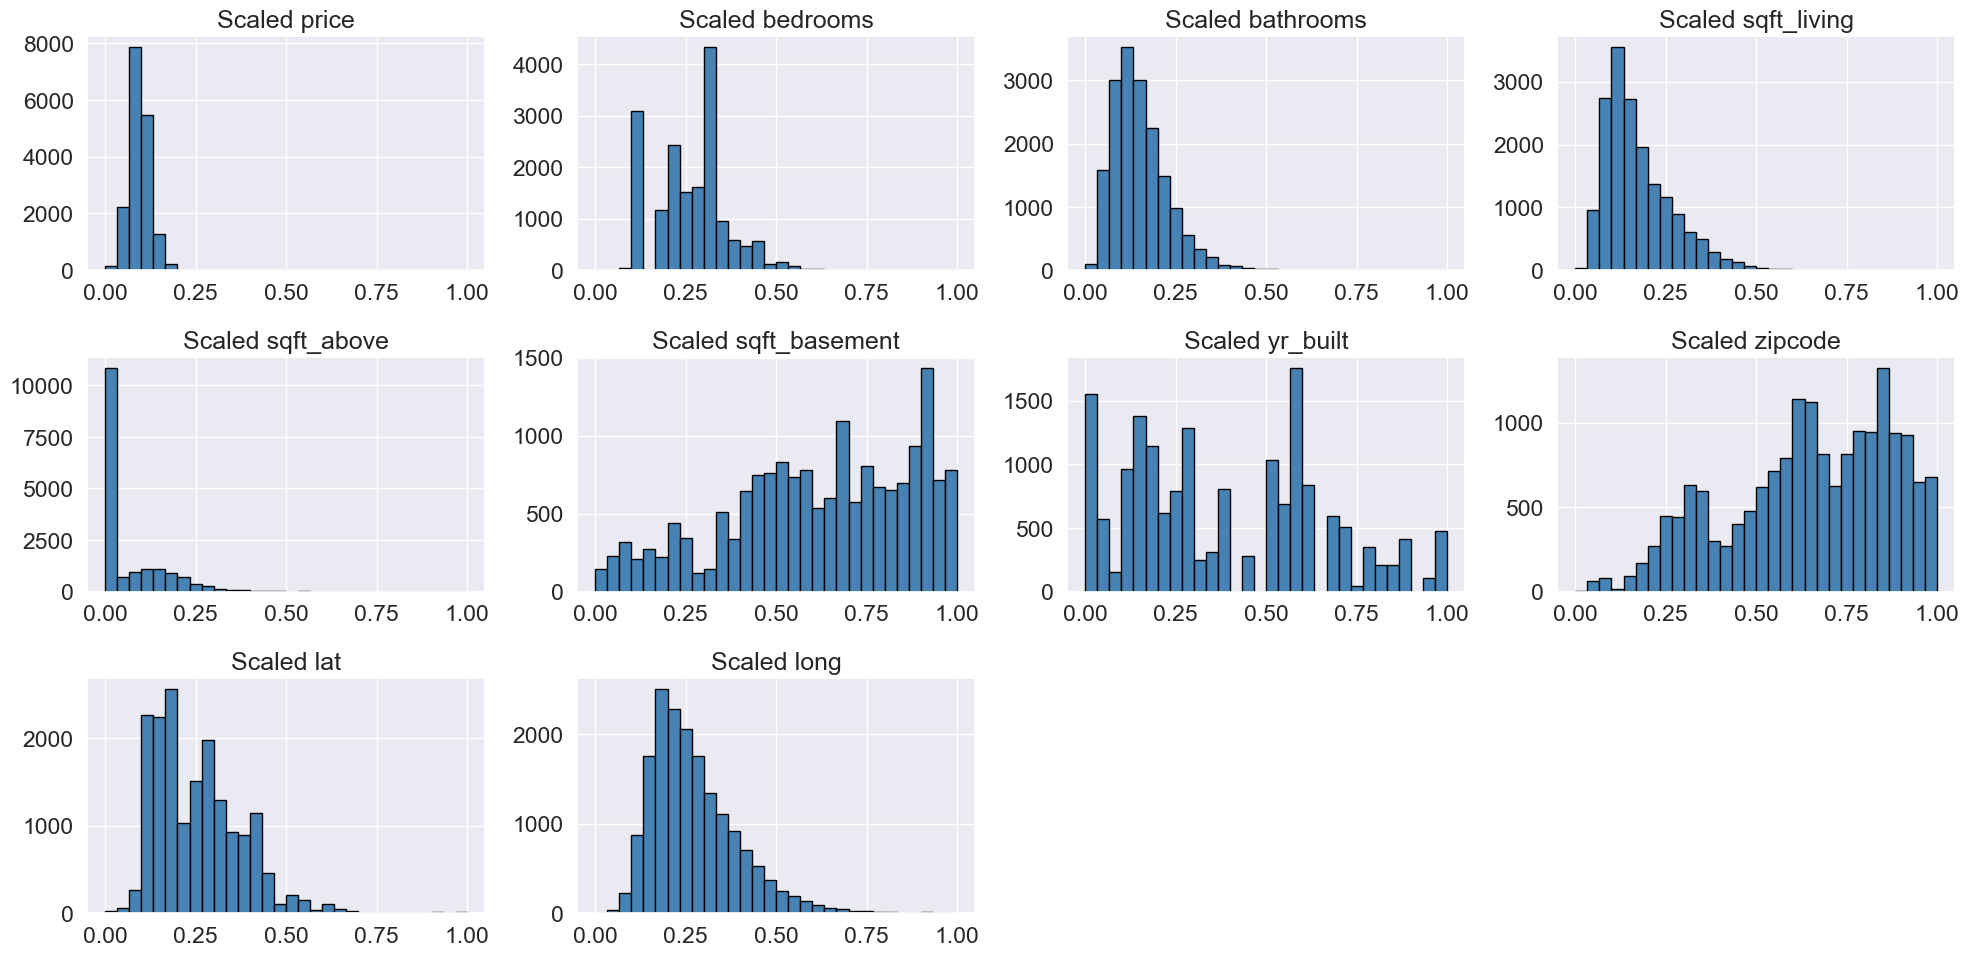

In [593]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
color = '#4682B4'

nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= X_train_scaled.shape[1]:
        ax.set_visible(False)
        continue
    ax.hist(X_train_scaled[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(f'Scaled {df1.columns[i]}')

plt.tight_layout()
plt.show()

In [594]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled, y_train)

predictions_xgb_minmax = xgbr.predict(X_test_scaled)

In [595]:
#Metrics
r2_3_m = r2_score(y_test, predictions_xgb_minmax)
RMSE_3_m = mean_squared_error(y_test, predictions_xgb_minmax, squared=False)
MSE_3_m = mean_squared_error(y_test, predictions_xgb_minmax)
MAE_3_m = mean_absolute_error(y_test, predictions_xgb_minmax)

#Printing the results
print("R2 = ", round(r2_3_m, 4))
print("RMSE = ", round(RMSE_3_m, 4))
print("The value of the metric MSE is ", round(MSE_3_m, 4))
print("MAE = ", round(MAE_3_m, 4))

R2 =  0.7854
RMSE =  180100.9243
The value of the metric MSE is  32436342931.3131
MAE =  85769.2974


In [596]:
#Model validation
# Make a dataframe to compare
eval_df_predictions_xgb_minmax = pd.DataFrame({"actual":y_test,"pred":predictions_xgb_minmax})
eval_df_predictions_xgb_minmax


,actual,pred
date_format,,
2014-10-06,365000.00,408815.88
2014-08-21,865000.00,1085099.00
2014-08-15,1038000.00,1147091.50
2015-03-31,1490000.00,3059294.75
2014-07-14,711000.00,712365.69
...,...,...
2014-11-10,338000.00,332839.78
2014-07-08,673000.00,762112.38
2014-10-16,285000.00,306055.59


In [597]:
eval_df_predictions_xgb_minmax["dif"] = abs(eval_df_predictions_xgb_minmax["actual"]-eval_df_predictions_xgb_minmax["pred"])
eval_df_predictions_xgb_minmax.head()

,actual,pred,dif
date_format,,,
2014-10-06,365000.00,408815.88,43815.88
2014-08-21,865000.00,1085099.00,220099.00
2014-08-15,1038000.00,1147091.50,109091.50
2015-03-31,1490000.00,3059294.75,1569294.75
2014-07-14,711000.00,712365.69,1365.69


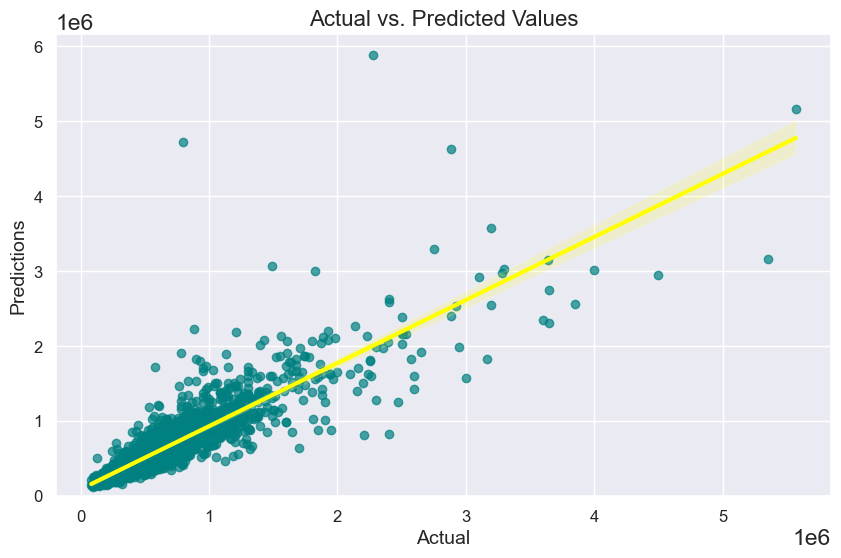

In [598]:
scatter_color = "#008080"
line_color = "#FFFF00"


plt.figure(figsize=(10, 6))


sns.regplot(x='actual', y='pred', data=eval_df_predictions_xgb_minmax,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})


plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


<h3 style="color: #0000FF;">Normalization with StandardScaler</h3>

In [599]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [600]:
xgbr.fit(X_train_scaled, y_train)
predictions_xgb_standscale = xgbr.predict(X_test_scaled)

In [601]:
#metrics
r2_3_s = r2_score(y_test, predictions_xgb_standscale)
RMSE_3_s = mean_squared_error(y_test, predictions_xgb_standscale, squared=False)
MSE_3_s = mean_squared_error(y_test, predictions_xgb_standscale)
MAE_3_s = mean_absolute_error(y_test, predictions_xgb_standscale)

#Printing the results
print("R2 = ", round(r2_3_s, 4))
print("RMSE = ", round(RMSE_3_s, 4))
print("The value of the metric MSE is ", round(MSE_3_s, 4))
print("MAE = ", round(MAE_3_s, 4))

R2 =  0.7854
RMSE =  180100.9243
The value of the metric MSE is  32436342931.3131
MAE =  85769.2974


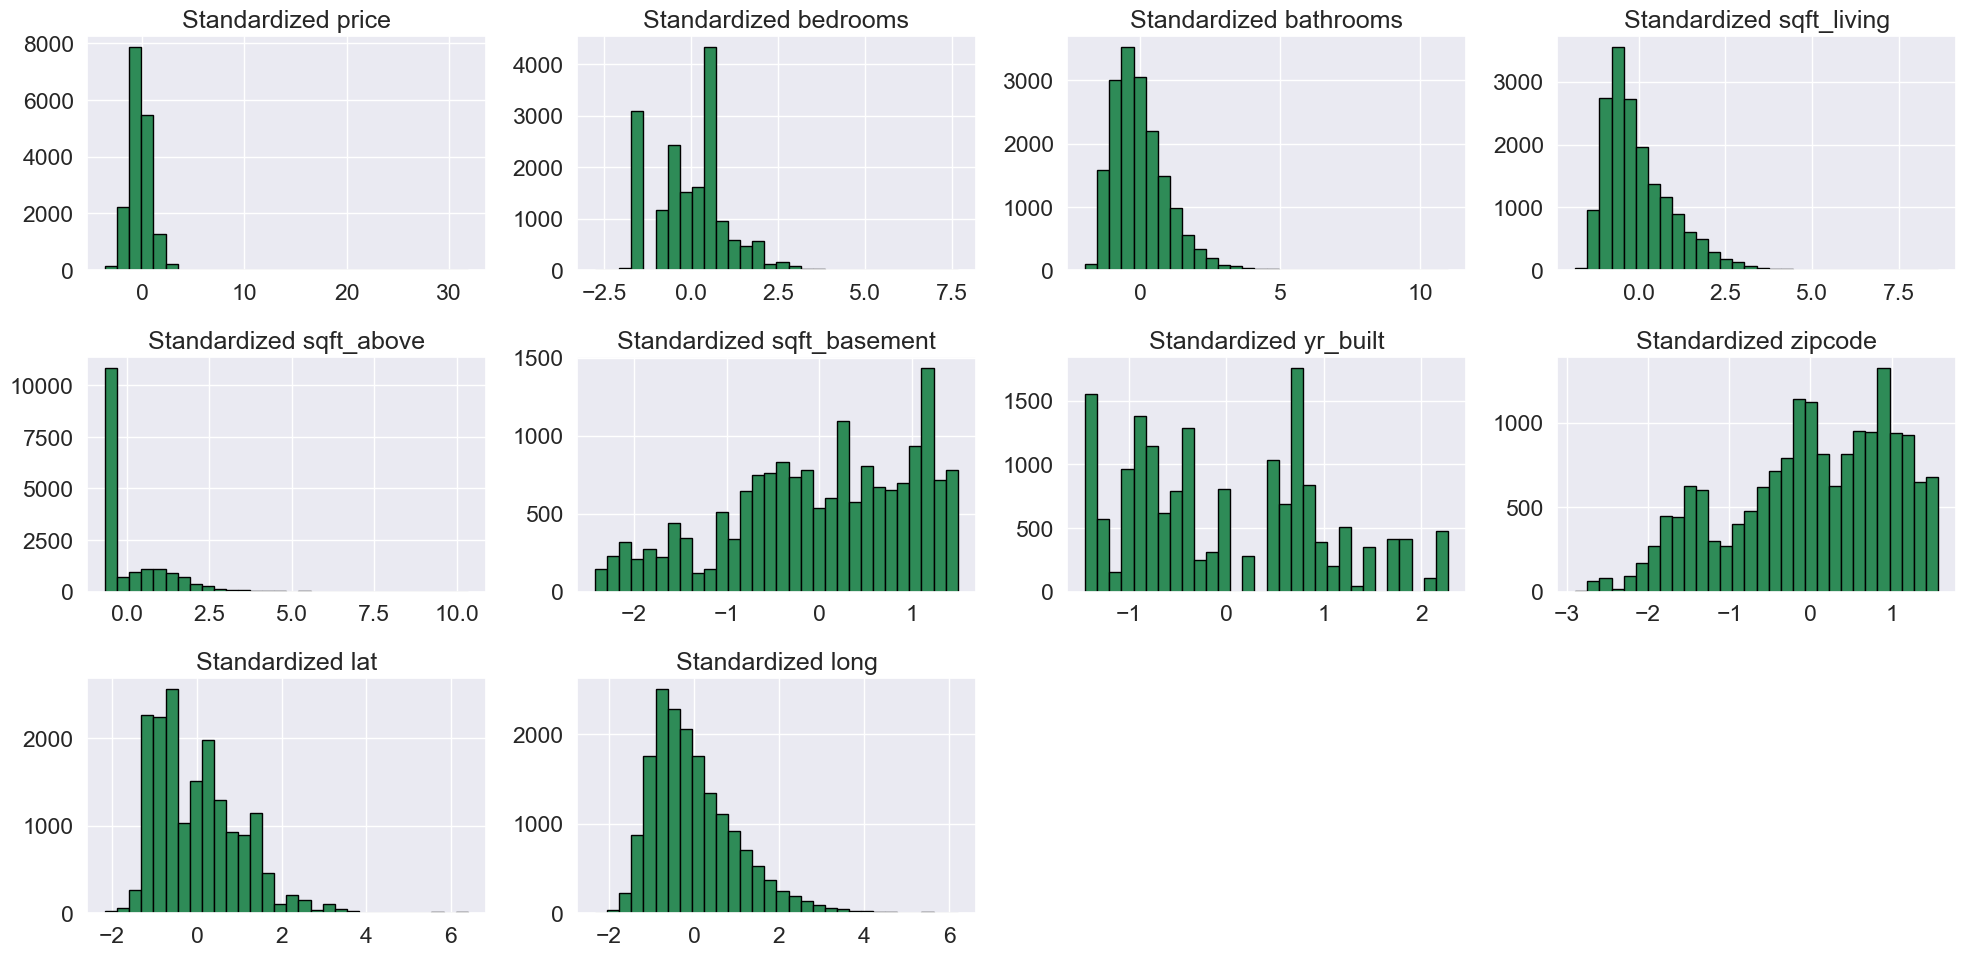

In [602]:
color = '#2E8B57'

nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= X_train_scaled.shape[1]:
        ax.set_visible(False)
        continue
    ax.hist(X_train_scaled[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(f'Standardized {df1.columns[i]}')

plt.tight_layout()
plt.show()

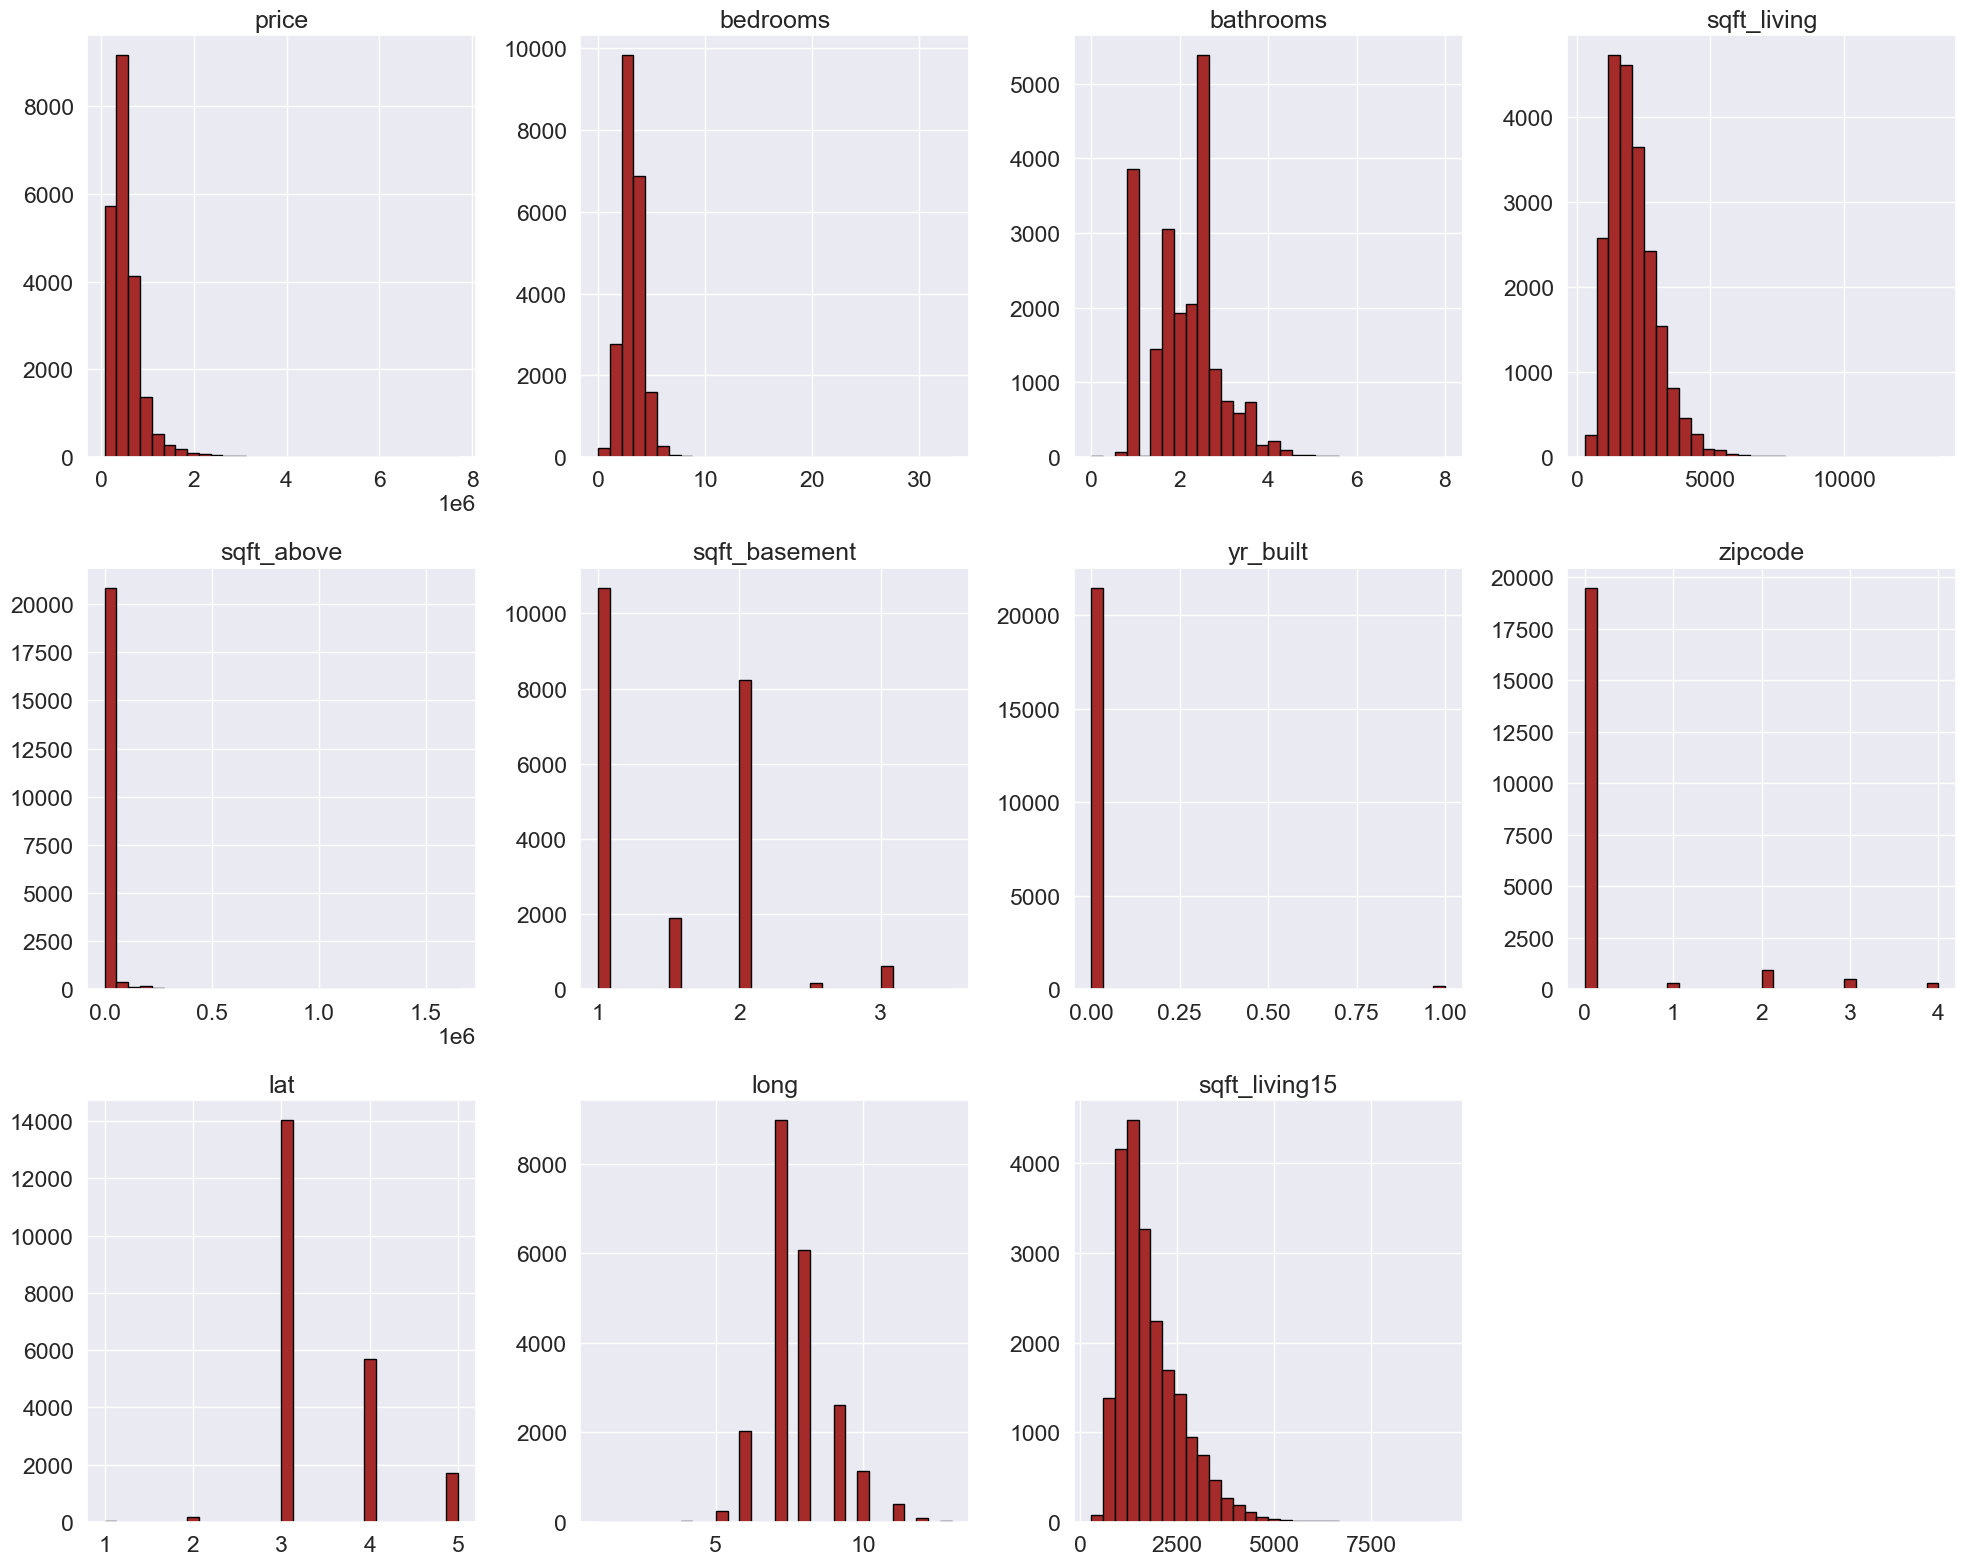

In [603]:
color = '#A52A2A'

# grid size
nrows, ncols = 3, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df1.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df1.columns[i])

plt.tight_layout()
plt.show()

In [604]:
#Model validation
# Make a dataframe to compare
eval_df_predictions_xgb_standscale = pd.DataFrame({"actual":y_test,"pred":predictions_xgb_standscale})
eval_df_predictions_xgb_standscale



,actual,pred
date_format,,
2014-10-06,365000.00,408815.88
2014-08-21,865000.00,1085099.00
2014-08-15,1038000.00,1147091.50
2015-03-31,1490000.00,3059294.75
2014-07-14,711000.00,712365.69
...,...,...
2014-11-10,338000.00,332839.78
2014-07-08,673000.00,762112.38
2014-10-16,285000.00,306055.59


In [605]:
eval_df_predictions_xgb_standscale["dif"] = abs(eval_df_predictions_xgb_standscale["actual"]-eval_df_predictions_xgb_standscale["pred"])
eval_df_predictions_xgb_standscale.head()

,actual,pred,dif
date_format,,,
2014-10-06,365000.00,408815.88,43815.88
2014-08-21,865000.00,1085099.00,220099.00
2014-08-15,1038000.00,1147091.50,109091.50
2015-03-31,1490000.00,3059294.75,1569294.75
2014-07-14,711000.00,712365.69,1365.69


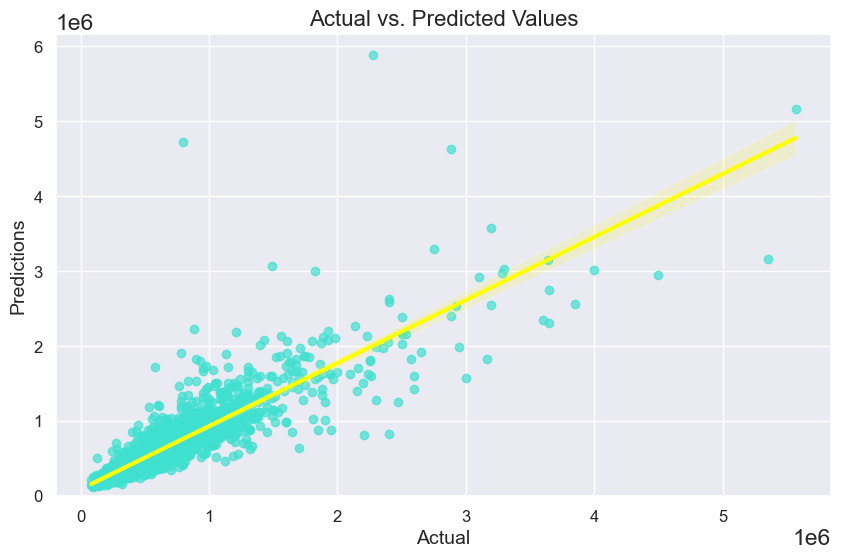

In [606]:
scatter_color = "#40E0D0"
line_color = "#FFFF00"


plt.figure(figsize=(10, 6))


sns.regplot(x='actual', y='pred', data=eval_df_predictions_xgb_standscale,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})


plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


<h3 style="color: #0000FF;">Normalization with log Transform</h3> 

In [607]:
#Normalization with log Transform
# Train data
X_train_log = np.log1p(X_train)  # np.log1p is useful to handle zero values 
X_test_log = np.log1p(X_test)

In [608]:
#Xgboost model
xgbr.fit(X_train_log, y_train)
predictions_xgb_log = xgbr.predict(X_test_log)

In [609]:
#Result xgboost
r2_3_l = r2_score(y_test, predictions_xgb_log)
RMSE_3_l = mean_squared_error(y_test, predictions_xgb_log, squared=False)
MSE_3_l = mean_squared_error(y_test, predictions_xgb_log)
MAE_3_l = mean_absolute_error(y_test, predictions_xgb_log)

#Printing the results
print("R2 = ", round(r2_3_l, 4))
print("RMSE = ", round(RMSE_3_l, 4))
print("The value of the metric MSE is ", round(MSE_3_l, 4))
print("MAE = ", round(MAE_3_l, 4))

R2 =  0.7605
RMSE =  190298.6171
The value of the metric MSE is  36213563684.4074
MAE =  89740.3153


In [610]:
#Model validation
# Make a dataframe to compare
eval_df_predictions_xgb_log = pd.DataFrame({"actual":y_test,"pred":predictions_xgb_log})
eval_df_predictions_xgb_log


,actual,pred
date_format,,
2014-10-06,365000.00,397731.12
2014-08-21,865000.00,775704.12
2014-08-15,1038000.00,1090989.00
2015-03-31,1490000.00,2532531.75
2014-07-14,711000.00,743733.88
...,...,...
2014-11-10,338000.00,328790.66
2014-07-08,673000.00,733158.69
2014-10-16,285000.00,293293.78


In [611]:
eval_df_predictions_xgb_log["dif"] = abs(eval_df_predictions_xgb_log["actual"]-eval_df_predictions_xgb_log["pred"])
eval_df_predictions_xgb_log.head()

,actual,pred,dif
date_format,,,
2014-10-06,365000.00,397731.12,32731.12
2014-08-21,865000.00,775704.12,89295.88
2014-08-15,1038000.00,1090989.00,52989.00
2015-03-31,1490000.00,2532531.75,1042531.75
2014-07-14,711000.00,743733.88,32733.88


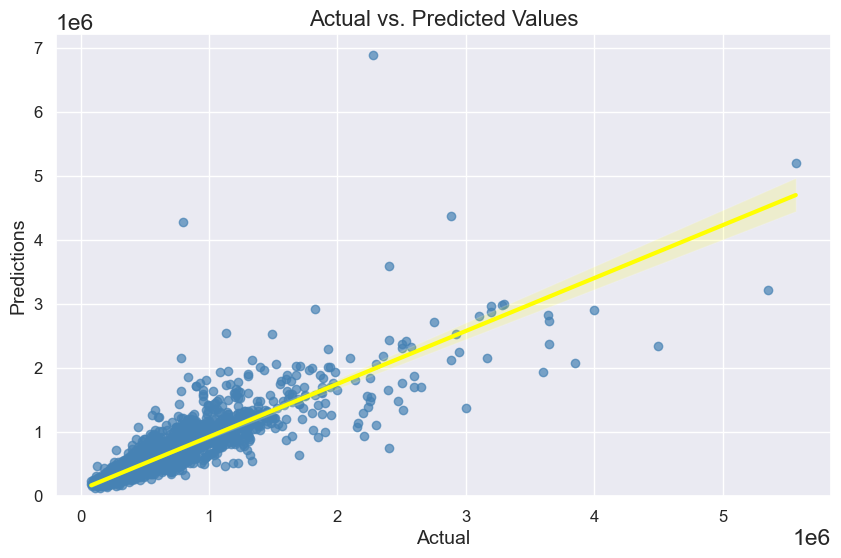

In [612]:
scatter_color = "#4682B4"
line_color = "#FFFF00"


plt.figure(figsize=(10, 6))


sns.regplot(x='actual', y='pred', data=eval_df_predictions_xgb_log,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})


plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


<h3 style="color: #0000FF;">Improving it dropping multicollinearity features</h3> 

In [613]:
df1.corrwith(df1["price"]).sort_values(ascending=False)

price            1.00
sqft_living      0.70
sqft_above       0.61
sqft_living15    0.59
bathrooms        0.53
sqft_basement    0.32
bedrooms         0.31
lat              0.31
yr_built         0.05
long             0.02
zipcode         -0.05
dtype: float64

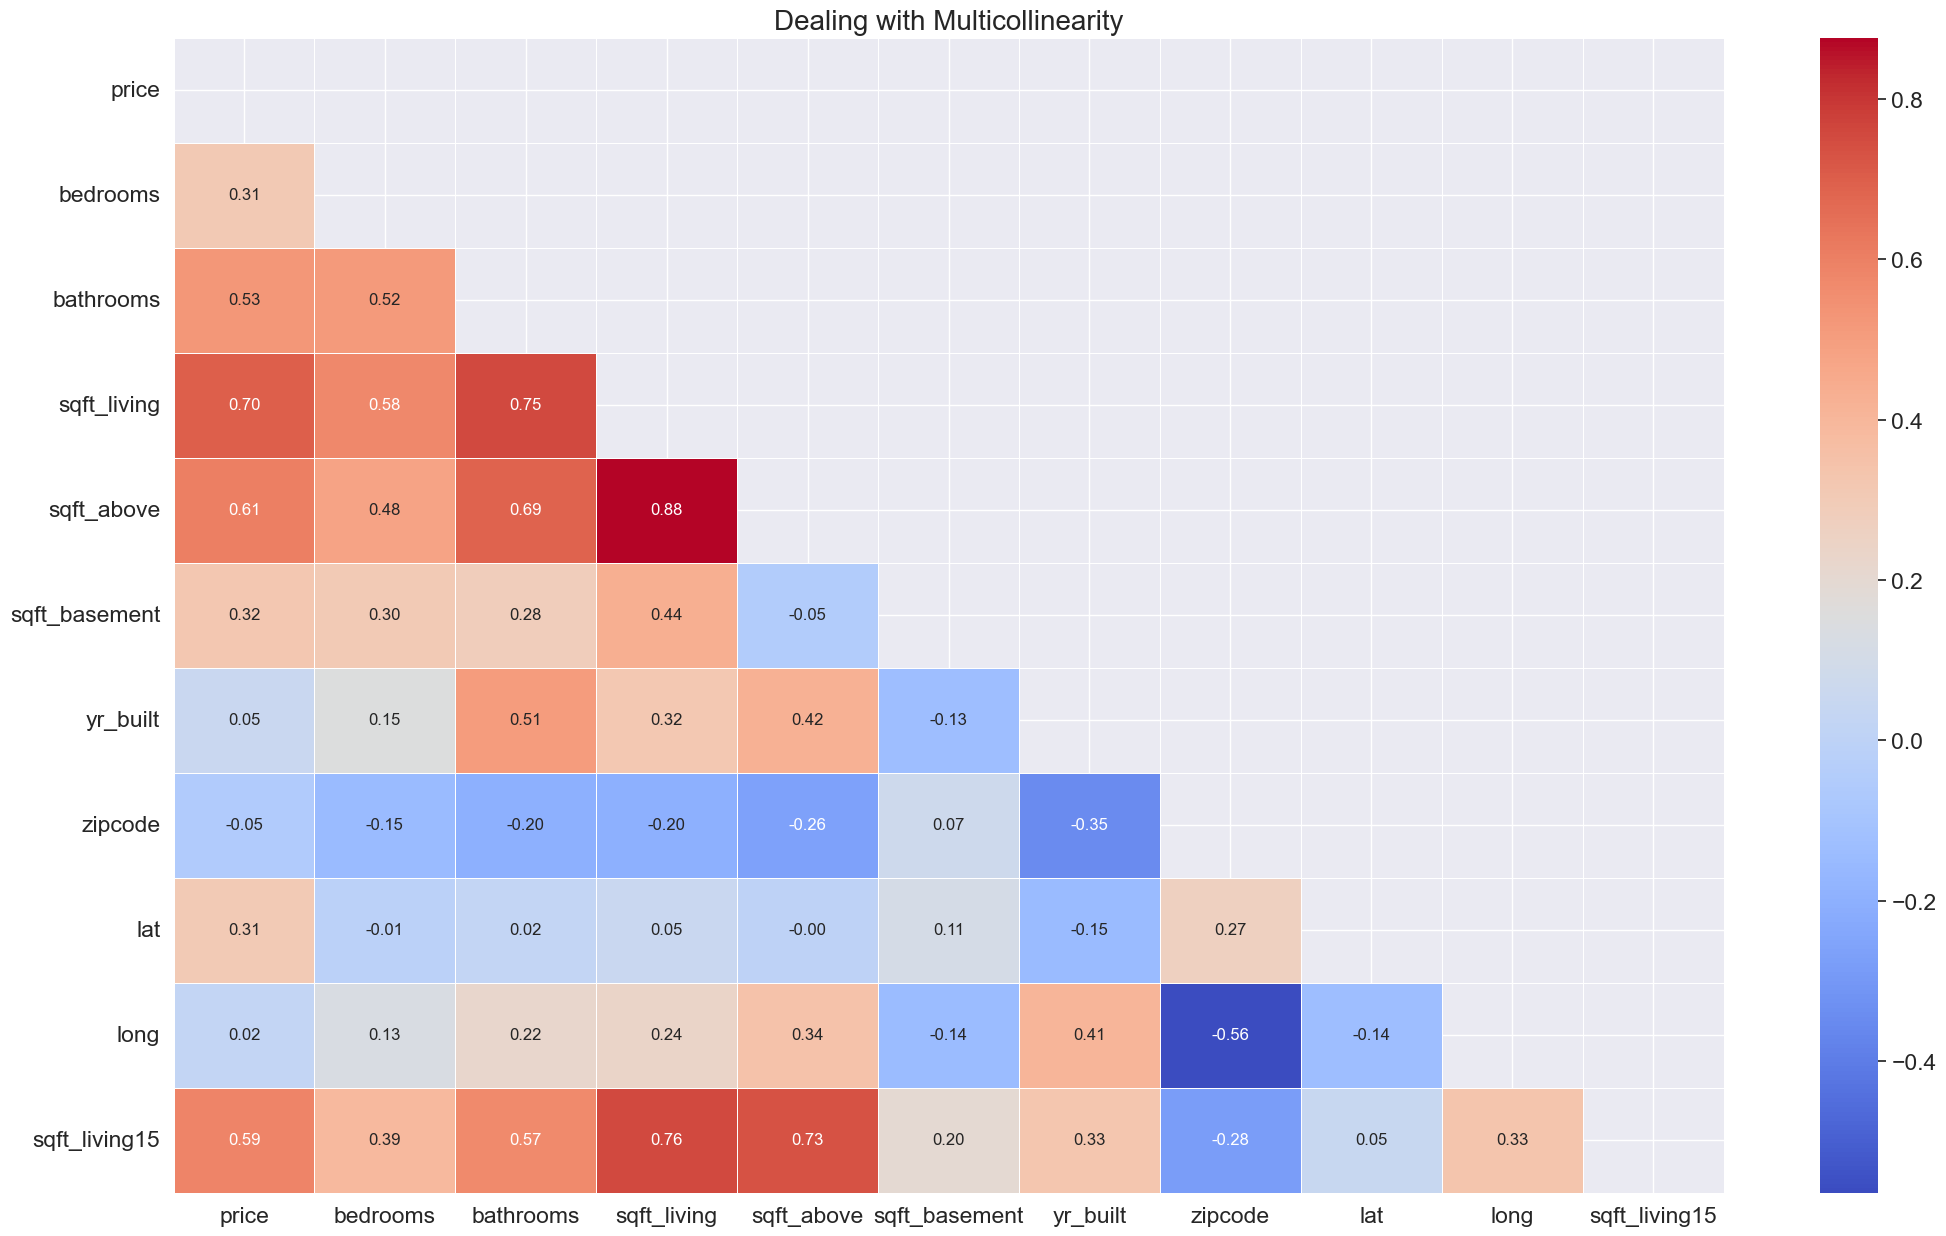

In [614]:
# Correlation Matrix-Heatmap Plot
num_corr = df1.corr()
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

sqft above and sqft_living have high correlation suggesting that dropping one of these varaibles can improve the model

sqft living_15 and sqft_living have high correlation suggesting that dropping one of these varaibles can improve the model

Bathroom and sqft_living have high correlation suggesting that dropping one of these varaibles can improve the model

In [615]:
columns_to_drop_new = ['sqft_above', 'sqft_living15', 'bathrooms']
df2 = df1.drop(columns=columns_to_drop_new)

In [616]:
#Train_test split for cleaned dataset df1
X = df2.drop(columns=['price'])  # Exclude'price' from X train as is target variable
y = df2['price']

In [617]:
# Split the cleaned dataset df2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [618]:
print(X_train.columns)
print(X_test.columns)

Index(['bedrooms', 'sqft_living', 'sqft_basement', 'yr_built', 'zipcode',
       'lat', 'long'],
      dtype='object')
Index(['bedrooms', 'sqft_living', 'sqft_basement', 'yr_built', 'zipcode',
       'lat', 'long'],
      dtype='object')


In [619]:
#xgboost model for df2
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

predictions_xgb_c = xgbr.predict(X_test)

In [620]:
#Metics
r2_c = r2_score(y_test, predictions_xgb)
RMSE_c = mean_squared_error(y_test, predictions_xgb_c, squared=False)
MSE_c = mean_squared_error(y_test, predictions_xgb_c)
MAE_c = mean_absolute_error(y_test, predictions_xgb_c)

#Printing the results
print("R2 = ", round(r2_c, 4))
print("RMSE = ", round(RMSE_c, 4))
print("The value of the metric MSE is ", round(MSE_c, 4))
print("MAE = ", round(MAE_c, 4))

R2 =  0.734
RMSE =  192325.7192
The value of the metric MSE is  36989182263.3591
MAE =  105805.021


<h3 style="color: #0000FF;"> Dealing with outliers</h3>

In [621]:
def outlier_slayer(data, target_column): 
    """
    Automatically removes outliers based on Q1, Q3, excluding the target column, price.

    """
    for column in data.select_dtypes(include=[np.number]).columns:
        if column == target_column:  # Skip the target column
            continue
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [622]:
cleaned_data = outlier_slayer(data=df1, target_column='price')

In [623]:
# Shape of cleaned data
print("Original Data Shape:", df1.shape)
print("Cleaned Data Shape:", cleaned_data.shape)

Original Data Shape: (21613, 11)
Cleaned Data Shape: (18973, 11)


#### Training with new cleaned data

In [624]:
# Split the cleaned_data into features (X) and target (y)
X = cleaned_data.drop(columns=['price'])  # Drop the target column
y = cleaned_data['price'] 

In [625]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [626]:
xgbr = xgb.XGBRFRegressor()

xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [627]:
predictions_xgb_outlier = xgbr.predict(X_test)

In [628]:
r2_o = r2_score(y_test, predictions_xgb_outlier)
rmse_o = mean_squared_error(y_test, predictions_xgb_outlier, squared=False)
mse_o = mean_squared_error(y_test, predictions_xgb_outlier)
mae_o = mean_absolute_error(y_test, predictions_xgb_outlier)

# Print results
print("R2 Score:", round(r2_o, 4))
print("RMSE:", round(rmse_o, 4))
print("MSE:", round(mse_o, 4))
print("MAE:", round(mae_o, 4))

R2 Score: 0.7423
RMSE: 117453.388
MSE: 13795298341.3811
MAE: 76748.9714


In [629]:
# Make a dataframe to compare
eval_df_xgb_oulier = pd.DataFrame({"actual":y_test,"pred":predictions_xgb_outlier})
eval_df_xgb_oulier

,actual,pred
date_format,,
2014-09-12,561000.00,528233.56
2015-04-27,543000.00,591984.62
2014-11-14,454000.00,415484.91
2014-05-21,195000.00,213682.33
2015-05-05,254000.00,246046.00
...,...,...
2014-05-26,880000.00,527073.94
2014-12-01,1210000.00,1276921.25
2014-08-27,450000.00,385868.69


In [630]:
eval_df_xgb_oulier["dif"] = abs(eval_df_xgb_oulier["actual"]-eval_df_xgb_oulier["pred"])
eval_df_xgb_oulier.head()

,actual,pred,dif
date_format,,,
2014-09-12,561000.00,528233.56,32766.44
2015-04-27,543000.00,591984.62,48984.62
2014-11-14,454000.00,415484.91,38515.09
2014-05-21,195000.00,213682.33,18682.33
2015-05-05,254000.00,246046.00,7954.00


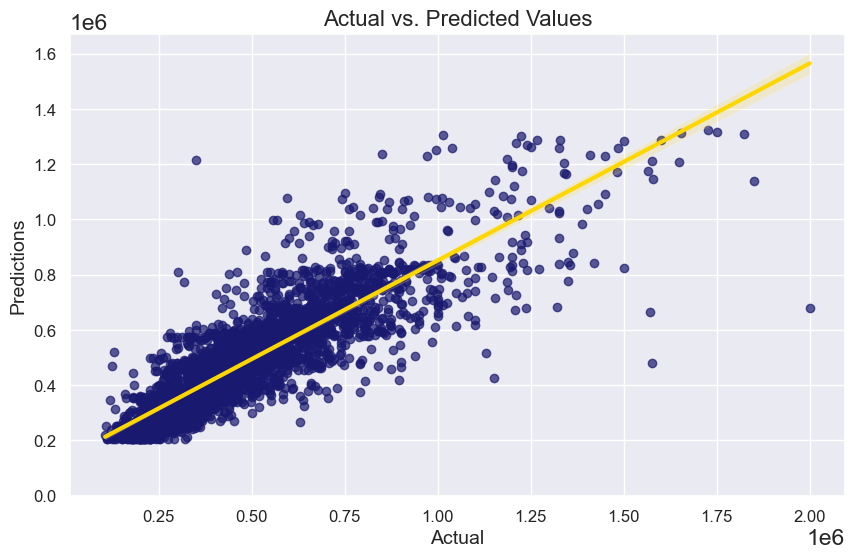

In [631]:
scatter_color = "#191970"
line_color = "#FFD700"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='pred', data=eval_df_xgb_oulier,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<h2 style="color: #FF0000;"> Reporting </h2>

In [632]:
df_concat = pd.concat([df1, df2], axis=1)

In [633]:
metrics_concat = {
    'Model': ['Before Cleaning', 'After Cleaning (Dropping Features)', 'After Normalizing MinMax Scaler', 'After Normalizing Standard Scaler', 'After dealing with multiculiniarity', 'After Normalizing Log Transform', 'After Dealing with Outliers (Dropping Outliers)'],
    'R²': [r2_3_6, r2_3_x, r2_3_m, r2_3_s, r2_3_l , r2_c, r2_o],
    'RMSE': [RMSE_3_6, RMSE_3_x, RMSE_3_m, RMSE_3_s, RMSE_3_l,RMSE_c, rmse_o],
    'MSE': [MSE_3_6, MSE_3_x, MSE_3_m, MSE_3_s, MSE_3_l, MSE_c, mse_o],
    'MAE': [MAE_3_6, MAE_3_x, MAE_3_m, MAE_3_s, MAE_3_l,MAE_c, mae_o]
}

In [634]:
concat_metrics = pd.DataFrame(metrics_concat)
concat_metrics.set_index("Model").T
pd.options.display.float_format = '{:.2f}'.format
concat_metrics

,Model,R²,RMSE,MSE,MAE
0,Before Cleaning,0.77,183347.28,33616225987.47,100507.18
1,After Cleaning (Dropping Features),0.73,200538.05,40215508911.06,104656.15
2,After Normalizing MinMax Scaler,0.79,180100.92,32436342931.31,85769.30
3,After Normalizing Standard Scaler,0.79,180100.92,32436342931.31,85769.30
4,After dealing with multiculiniarity,0.76,190298.62,36213563684.41,89740.32
5,After Normalizing Log Transform,0.73,192325.72,36989182263.36,105805.02
6,After Dealing with Outliers (Dropping Outliers),0.74,117453.39,13795298341.38,76748.97


MinMax scaler and Standard Scaler models provide higher R2 with better explanantiona of data and lower erros are best methods to improve the model